In [1]:
import pandas as pd
import os
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1ph9qcAk_hZsUnVWmDIBgs5NF-9iX4uP3/export?format=csv")

In [3]:
df.isnull().sum().sum() / df.size

0.37307312208169

In [4]:
df.isnull().sum()/100

Unnamed: 0             0.00
QKEY                   0.00
INTERVIEW_START_W99    0.00
INTERVIEW_END_W99      0.00
DEVICE_TYPE_W99        0.00
                       ... 
F_IDEO                 0.00
F_INTFREQ              1.73
F_VOLSUM               0.00
F_INC_TIER2            0.00
WEIGHT_W99             0.00
Length: 215, dtype: float64

In [5]:
EXCITEOE = ["EXCITEOE_W99_OE1","EXCITEOE_W99_OE2","EXCITEOE_W99_OE3","EXCITEOE_REFUSED_W99"]
CONCERNOE = ["CONCERNOE_W99_OE1", "CONCERNOE_W99_OE2","CONCERNOE_W99_OE3", "CONCERNOE_REFUSED_W99"]
DISCRIM = ["DISCRIM1_a_W99","DISCRIM1_b_W99", "DISCRIM1_c_W99","DISCRIM1_d_W99", "DISCRIM1_e_W99","DISCRIM1_f_W99"]
POSNEGAI = ["POSNEGAI_a_W99","POSNEGAI_b_W99","POSNEGAI_c_W99","POSNEGAI_d_W99","POSNEGAI_e_W99","POSNEGAI_f_W99"]
POSNEGHE = ["POSNEGHE_a_W99","POSNEGHE_b_W99","POSNEGHE_c_W99","POSNEGHE_d_W99","POSNEGHE_e_W99","POSNEGHE_f_W99"]
SMAL_W99 = ["SMALG1_W99","SMALG2_W99","SMALG3_W99","SMALG4_a_W99","SMALG4_b_W99","SMALG4_c_W99","SMALG4_d_W99","SMALG5_W99","SMALG6_W99","SMALG7_W99","SMALG8_W99","SMALG9_a_W99","SMALG9_b_W99","SMALG9_c_W99","SMALG10_a_W99","SMALG10_b_W99","SMALG10_c_W99","SMALG11_W99","SMALG12_W99","SMALG13_a_W99","SMALG13_b_W99","SMALG13_c_W99","SMALG13_d_W99"]
FACERE =["FACEREC1_W99","FACEREC2_W99","FACEREC3_a_W99","FACEREC3_b_W99","FACEREC3_c_W99","FACEREC3_d_W99","FACEREC3_e_W99","FACEREC3_f_W99","FACEREC4_W99","FACEREC5_W99","FACEREC6_a_W99","FACEREC6_b_W99","FACEREC6_c_W99","FACEREC6_d_W99","FACEREC7_W99","FACEREC8_a_W99","FACEREC8_b_W99","FACEREC8_c_W99","FACEREC9_W99","FACEREC10_W99","FACEREC11_a_W99","FACEREC11_b_W99","FACEREC11_c_W99","FACEREC12_a_W99","FACEREC12_b_W99","FACEREC12_c_W99","FACEREC12_d_W99"]
DCARS = ['DCARS1_W99', 'DCARS2_W99', 'DCARS3_W99', 'DCARS4_a_W99', 'DCARS4_b_W99','DCARS4_c_W99', 'DCARS4_d_W99', 'DCARS5_W99', 'DCARS6_W99', 'DCARS7_W99','DCARS8_a_W99', 'DCARS8_b_W99', 'DCARS8_c_W99', 'DCARS8_d_W99', 'DCARS9_W99','DCARS10_W99', 'DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99','DCARS12_W99', 'DCARS13_a_W99', 'DCARS13_b_W99', 'DCARS13_c_W99', 'DCARS13_d_W99']
BCHIP = ["BCHIP1_W99","BCHIP2_W99","BCHIP3_W99","BCHIP4_a_W99","BCHIP4_b_W99","BCHIP4_c_W99","BCHIP4_d_W99","BCHIP5_W99","BCHIP6_W99","BCHIP7_W99","BCHIP8_W99","BCHIP9_a_W99","BCHIP9_b_W99","BCHIP9_c_W99","BCHIP10_a_W99","BCHIP10_b_W99","BCHIP10_c_W99","BCHIP10_d_W99","BCHIP11_W99","BCHIP12_W99","BCHIP13_a_W99","BCHIP13_b_W99","BCHIP14_a_W99","BCHIP14_b_W99","BCHIP14_c_W99","BCHIP14_d_W99"]
GENEV = ["GENEV1_W99","GENEV2_W99","GENEV3_W99","GENEV4_a_W99","GENEV4_b_W99","GENEV4_c_W99","GENEV4_d_W99","GENEV5_W99","GENEV6_W99","GENEV7_W99","GENEV8_W99","GENEV9_a_W99","GENEV9_b_W99","GENEV9_c_W99","GENEV9_d_W99","GENEV10_W99","GENEV11_W99","GENEV12_a_W99","GENEV12_b_W99","GENEV12_c_W99","GENEV13_a_W99","GENEV13_b_W99"]
EXO =["EXOV1_W99","EXOV2_W99","EXOV3_W99","EXOV4_a_W99","EXOV4_b_W99","EXOV4_c_W99","EXOV4_d_W99","EXOV5_W99","EXOV6_W99","EXOV6_W99","EXOV7_W99","EXOV8_a_W99","EXOV8_b_W99","EXOV8_c_W99","EXOV8_d_W99","EXOV9_W99","EXOV10_W99","EXOV11_a_W99","EXOV11_b_W99","EXOV12_a_W99","EXOV12_b_W99","EXOV12_c_W99"]
INTERVIEW_TIME = ["INTERVIEW_START_W99","INTERVIEW_END_W99"]


In [6]:
# Combine all column lists
columns_to_drop = POSNEGAI + POSNEGHE + SMAL_W99 + FACERE + BCHIP + GENEV + EXO+ INTERVIEW_TIME+EXCITEOE+CONCERNOE
# Drop the specified columns
df_dropped = df.drop(columns=columns_to_drop)

In [7]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10260 entries, 0 to 10259
Data columns (total 74 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10260 non-null  int64  
 1   QKEY                  10260 non-null  int64  
 2   DEVICE_TYPE_W99       10260 non-null  object 
 3   LANG_W99              10260 non-null  object 
 4   FORM_W99              10260 non-null  object 
 5   XTABLET_W99           10260 non-null  object 
 6   TECH1_W99             5153 non-null   object 
 7   SC1_W99               5107 non-null   object 
 8   CNCEXC_W99            10260 non-null  object 
 9   ALGFAIR_W99           10260 non-null  object 
 10  DISCRIM1_a_W99        10260 non-null  object 
 11  DISCRIM1_b_W99        10260 non-null  object 
 12  DISCRIM1_c_W99        10260 non-null  object 
 13  DISCRIM1_d_W99        10260 non-null  object 
 14  DISCRIM1_e_W99        10260 non-null  object 
 15  DISCRIM1_f_W99     

In [8]:
df_dropped.head()

,Unnamed: 0,QKEY,DEVICE_TYPE_W99,LANG_W99,FORM_W99,XTABLET_W99,TECH1_W99,SC1_W99,CNCEXC_W99,ALGFAIR_W99,...,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_PARTYSUMIDEO_FINAL,F_INC_SDT1,F_REG,F_IDEO,F_INTFREQ,F_VOLSUM,F_INC_TIER2,WEIGHT_W99
0,0,100260,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Mostly positive,Equally concerned and excited,Not possible,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,"$50,000 to less than $60,000",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Several times a day,No,Middle income,0.206396
1,1,100314,Smartphone,English,Form 1,Non-tablet HH,Mostly positive,NaN,More excited than concerned,Possible,...,NaN,Rep/Lean Rep,Moderate/Liberal Rep/Lean,"$40,000 to less than $50,000",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Several times a day,Yes,Middle income,0.315090
2,2,100363,Smartphone,English,Form 1,Non-tablet HH,Mostly positive,NaN,Equally concerned and excited,Not possible,...,NaN,Dem/Lean Dem,Moderate/Conservative Dem/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Several times a day,No,Upper income,0.829579
3,3,100598,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Mostly positive,Equally concerned and excited,Not possible,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Several times a day,Yes,Upper income,0.337527
4,4,100637,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Equal positive and negative effects,Equally concerned and excited,Not sure,...,The Republican Party,Rep/Lean Rep,Conservative Rep/Lean,"$30,000 to less than $40,000",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Less often,No,Lower income,1.210606


In [9]:
df_dropped = df_dropped.drop(columns=["Unnamed: 0","QKEY","DEVICE_TYPE_W99","FORM_W99","XTABLET_W99","F_PARTYLN_FINAL","F_PARTYSUM_FINAL","F_PARTYSUMIDEO_FINAL","F_RELIG","F_BORN","F_ATTEND","F_RELIMP","F_PRAY","F_INC_SDT1","F_IDEO","F_INTFREQ","F_VOLSUM","F_RACECMB","F_HISP","F_HISP_ORIGIN","F_EDUCCAT","F_YEARSINUS","LANG_W99","F_BIRTHPLACE","F_RELCOM3CAT","F_CREGION","F_REG"])

In [10]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10260 entries, 0 to 10259
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TECH1_W99       5153 non-null   object 
 1   SC1_W99         5107 non-null   object 
 2   CNCEXC_W99      10260 non-null  object 
 3   ALGFAIR_W99     10260 non-null  object 
 4   DISCRIM1_a_W99  10260 non-null  object 
 5   DISCRIM1_b_W99  10260 non-null  object 
 6   DISCRIM1_c_W99  10260 non-null  object 
 7   DISCRIM1_d_W99  10260 non-null  object 
 8   DISCRIM1_e_W99  10260 non-null  object 
 9   DISCRIM1_f_W99  10260 non-null  object 
 10  DCARS1_W99      5153 non-null   object 
 11  DCARS2_W99      5153 non-null   object 
 12  DCARS3_W99      5153 non-null   object 
 13  DCARS4_a_W99    5153 non-null   object 
 14  DCARS4_b_W99    5153 non-null   object 
 15  DCARS4_c_W99    5153 non-null   object 
 16  DCARS4_d_W99    5153 non-null   object 
 17  DCARS5_W99      5153 non-null  

In [11]:
#Check to see if there are any missing values
df_dropped.isnull().sum()/100

TECH1_W99         51.07
SC1_W99           51.53
CNCEXC_W99         0.00
ALGFAIR_W99        0.00
DISCRIM1_a_W99     0.00
DISCRIM1_b_W99     0.00
DISCRIM1_c_W99     0.00
DISCRIM1_d_W99     0.00
DISCRIM1_e_W99     0.00
DISCRIM1_f_W99     0.00
DCARS1_W99        51.07
DCARS2_W99        51.07
DCARS3_W99        51.07
DCARS4_a_W99      51.07
DCARS4_b_W99      51.07
DCARS4_c_W99      51.07
DCARS4_d_W99      51.07
DCARS5_W99        51.07
DCARS6_W99        51.07
DCARS7_W99        51.07
DCARS8_a_W99      51.07
DCARS8_b_W99      51.07
DCARS8_c_W99      51.07
DCARS8_d_W99      51.07
DCARS9_W99        51.07
DCARS10_W99       51.07
DCARS11_a_W99     51.07
DCARS11_b_W99     51.07
DCARS11_c_W99     51.07
DCARS11_d_W99     51.07
DCARS12_W99       51.07
DCARS13_a_W99     51.07
DCARS13_b_W99     51.07
DCARS13_c_W99     51.07
DCARS13_d_W99     51.07
F_METRO            0.00
F_CDIVISION        0.00
F_AGECAT           0.00
F_GENDER           0.00
F_EDUCCAT2         0.00
F_RACETHNMOD       0.00
F_CITIZEN       

In [12]:
threshold = len(df_dropped) * 0.05
threshold

513.0

In [13]:
cols_to_drop = df_dropped.columns[df_dropped.isna().sum() <= threshold]
cols_to_drop

Index(['CNCEXC_W99', 'ALGFAIR_W99', 'DISCRIM1_a_W99', 'DISCRIM1_b_W99',
       'DISCRIM1_c_W99', 'DISCRIM1_d_W99', 'DISCRIM1_e_W99', 'DISCRIM1_f_W99',
       'F_METRO', 'F_CDIVISION', 'F_AGECAT', 'F_GENDER', 'F_EDUCCAT2',
       'F_RACETHNMOD', 'F_CITIZEN', 'F_MARITAL', 'F_RELIGCAT1',
       'F_PARTY_FINAL', 'F_INC_TIER2', 'WEIGHT_W99'],
      dtype='object')

In [14]:
df.dropna(subset=cols_to_drop, inplace=True)

In [15]:
cols_with_missing_values = df_dropped.columns[df_dropped.isna().sum() > 0]
cols_with_missing_values

Index(['TECH1_W99', 'SC1_W99', 'DCARS1_W99', 'DCARS2_W99', 'DCARS3_W99',
       'DCARS4_a_W99', 'DCARS4_b_W99', 'DCARS4_c_W99', 'DCARS4_d_W99',
       'DCARS5_W99', 'DCARS6_W99', 'DCARS7_W99', 'DCARS8_a_W99',
       'DCARS8_b_W99', 'DCARS8_c_W99', 'DCARS8_d_W99', 'DCARS9_W99',
       'DCARS10_W99', 'DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99',
       'DCARS11_d_W99', 'DCARS12_W99', 'DCARS13_a_W99', 'DCARS13_b_W99',
       'DCARS13_c_W99', 'DCARS13_d_W99'],
      dtype='object')

In [16]:
df_dropped.isna().sum()/100

TECH1_W99         51.07
SC1_W99           51.53
CNCEXC_W99         0.00
ALGFAIR_W99        0.00
DISCRIM1_a_W99     0.00
DISCRIM1_b_W99     0.00
DISCRIM1_c_W99     0.00
DISCRIM1_d_W99     0.00
DISCRIM1_e_W99     0.00
DISCRIM1_f_W99     0.00
DCARS1_W99        51.07
DCARS2_W99        51.07
DCARS3_W99        51.07
DCARS4_a_W99      51.07
DCARS4_b_W99      51.07
DCARS4_c_W99      51.07
DCARS4_d_W99      51.07
DCARS5_W99        51.07
DCARS6_W99        51.07
DCARS7_W99        51.07
DCARS8_a_W99      51.07
DCARS8_b_W99      51.07
DCARS8_c_W99      51.07
DCARS8_d_W99      51.07
DCARS9_W99        51.07
DCARS10_W99       51.07
DCARS11_a_W99     51.07
DCARS11_b_W99     51.07
DCARS11_c_W99     51.07
DCARS11_d_W99     51.07
DCARS12_W99       51.07
DCARS13_a_W99     51.07
DCARS13_b_W99     51.07
DCARS13_c_W99     51.07
DCARS13_d_W99     51.07
F_METRO            0.00
F_CDIVISION        0.00
F_AGECAT           0.00
F_GENDER           0.00
F_EDUCCAT2         0.00
F_RACETHNMOD       0.00
F_CITIZEN       

In [17]:
imputer = SimpleImputer (strategy='most_frequent')
imputer.fit_transform(df_dropped)

array([['Mostly positive', 'Mostly positive',
        'Equally concerned and excited', ..., 'Republican',
        'Middle income', 0.2063963769],
       ['Mostly positive', 'Mostly positive',
        'More excited than concerned', ..., 'Republican',
        'Middle income', 0.3150902898],
       ['Mostly positive', 'Mostly positive',
        'Equally concerned and excited', ..., 'Democrat', 'Upper income',
        0.8295790779],
       ...,
       ['Mostly positive', 'Mostly positive',
        'More concerned than excited', ..., 'Independent',
        'Lower income', 0.2820789305],
       ['Mostly positive', 'Mostly positive',
        'More excited than concerned', ..., 'Republican',
        'Middle income', 0.4415245381],
       ['Mostly positive', 'Mostly positive',
        'More excited than concerned', ..., 'Independent',
        'Upper income', 0.90866993]], dtype=object)

In [18]:
columns_to_impute = [
    'TECH1_W99','SC1_W99','DCARS1_W99', 'DCARS2_W99', 'DCARS3_W99', 'DCARS4_a_W99', 'DCARS4_b_W99',
    'DCARS4_c_W99', 'DCARS4_d_W99', 'DCARS5_W99', 'DCARS6_W99', 'DCARS7_W99',
    'DCARS8_a_W99', 'DCARS8_b_W99', 'DCARS8_c_W99', 'DCARS8_d_W99', 'DCARS9_W99',
    'DCARS10_W99', 'DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99',
    'DCARS12_W99', 'DCARS13_a_W99', 'DCARS13_b_W99', 'DCARS13_c_W99', 'DCARS13_d_W99'
]

# Initialize the SimpleImputer with the mean strategy
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the specified columns
df_dropped[columns_to_impute] = imputer.fit_transform(df_dropped[columns_to_impute])

# Save the cleaned dataset
df_dropped.to_csv('https://docs.google.com/spreadsheets/d/1ph9qcAk_hZsUnVWmDIBgs5NF-9iX4uP3/export?format=csv', index=False)

# Optional: Display the first few rows of the updated dataframe
df_dropped.head()

,TECH1_W99,SC1_W99,CNCEXC_W99,ALGFAIR_W99,DISCRIM1_a_W99,DISCRIM1_b_W99,DISCRIM1_c_W99,DISCRIM1_d_W99,DISCRIM1_e_W99,DISCRIM1_f_W99,...,F_AGECAT,F_GENDER,F_EDUCCAT2,F_RACETHNMOD,F_CITIZEN,F_MARITAL,F_RELIGCAT1,F_PARTY_FINAL,F_INC_TIER2,WEIGHT_W99
0,Mostly positive,Mostly positive,Equally concerned and excited,Not possible,Not too well,Very well,Very well,Very well,Not sure,Not sure,...,65+,A man,College graduate/some post grad,White non-Hispanic,Yes,Never been married,Unaffiliated,Republican,Middle income,0.206396
1,Mostly positive,Mostly positive,More excited than concerned,Possible,Very well,Not too well,Not too well,Not sure,Somewhat well,Very well,...,65+,A man,"Some college, no degree",White non-Hispanic,Yes,Divorced,Protestant,Republican,Middle income,0.315090
2,Mostly positive,Mostly positive,Equally concerned and excited,Not possible,Somewhat well,Somewhat well,Somewhat well,Somewhat well,Very well,Somewhat well,...,30-49,A woman,Postgraduate,White non-Hispanic,Yes,Married,Catholic,Democrat,Upper income,0.829579
3,Mostly positive,Mostly positive,Equally concerned and excited,Not possible,Not sure,Not sure,Not sure,Not sure,Not sure,Not sure,...,50-64,A woman,Postgraduate,White non-Hispanic,Yes,Married,Protestant,Republican,Upper income,0.337527
4,Mostly positive,Equal positive and negative effects,Equally concerned and excited,Not sure,Not sure,Not sure,Not sure,Not sure,Very well,Not sure,...,65+,A woman,Associate's degree,White non-Hispanic,Yes,Married,Protestant,Independent,Lower income,1.210606


In [19]:
df_dropped.isna().sum()/100

TECH1_W99         0.0
SC1_W99           0.0
CNCEXC_W99        0.0
ALGFAIR_W99       0.0
DISCRIM1_a_W99    0.0
DISCRIM1_b_W99    0.0
DISCRIM1_c_W99    0.0
DISCRIM1_d_W99    0.0
DISCRIM1_e_W99    0.0
DISCRIM1_f_W99    0.0
DCARS1_W99        0.0
DCARS2_W99        0.0
DCARS3_W99        0.0
DCARS4_a_W99      0.0
DCARS4_b_W99      0.0
DCARS4_c_W99      0.0
DCARS4_d_W99      0.0
DCARS5_W99        0.0
DCARS6_W99        0.0
DCARS7_W99        0.0
DCARS8_a_W99      0.0
DCARS8_b_W99      0.0
DCARS8_c_W99      0.0
DCARS8_d_W99      0.0
DCARS9_W99        0.0
DCARS10_W99       0.0
DCARS11_a_W99     0.0
DCARS11_b_W99     0.0
DCARS11_c_W99     0.0
DCARS11_d_W99     0.0
DCARS12_W99       0.0
DCARS13_a_W99     0.0
DCARS13_b_W99     0.0
DCARS13_c_W99     0.0
DCARS13_d_W99     0.0
F_METRO           0.0
F_CDIVISION       0.0
F_AGECAT          0.0
F_GENDER          0.0
F_EDUCCAT2        0.0
F_RACETHNMOD      0.0
F_CITIZEN         0.0
F_MARITAL         0.0
F_RELIGCAT1       0.0
F_PARTY_FINAL     0.0
F_INC_TIER

In [20]:
df_dropped.isnull().sum().sum() / df_dropped.size

0.0

In [21]:
df_dropped.isna().sum()/100

TECH1_W99         0.0
SC1_W99           0.0
CNCEXC_W99        0.0
ALGFAIR_W99       0.0
DISCRIM1_a_W99    0.0
DISCRIM1_b_W99    0.0
DISCRIM1_c_W99    0.0
DISCRIM1_d_W99    0.0
DISCRIM1_e_W99    0.0
DISCRIM1_f_W99    0.0
DCARS1_W99        0.0
DCARS2_W99        0.0
DCARS3_W99        0.0
DCARS4_a_W99      0.0
DCARS4_b_W99      0.0
DCARS4_c_W99      0.0
DCARS4_d_W99      0.0
DCARS5_W99        0.0
DCARS6_W99        0.0
DCARS7_W99        0.0
DCARS8_a_W99      0.0
DCARS8_b_W99      0.0
DCARS8_c_W99      0.0
DCARS8_d_W99      0.0
DCARS9_W99        0.0
DCARS10_W99       0.0
DCARS11_a_W99     0.0
DCARS11_b_W99     0.0
DCARS11_c_W99     0.0
DCARS11_d_W99     0.0
DCARS12_W99       0.0
DCARS13_a_W99     0.0
DCARS13_b_W99     0.0
DCARS13_c_W99     0.0
DCARS13_d_W99     0.0
F_METRO           0.0
F_CDIVISION       0.0
F_AGECAT          0.0
F_GENDER          0.0
F_EDUCCAT2        0.0
F_RACETHNMOD      0.0
F_CITIZEN         0.0
F_MARITAL         0.0
F_RELIGCAT1       0.0
F_PARTY_FINAL     0.0
F_INC_TIER

In [22]:
#SHOW unique values in F_GENDER_W99
print(df_dropped['F_GENDER'].unique())

['A man' 'A woman' 'In some other way' 'Refused']


In [23]:
# Define the value to be replaced and the new value
other_value = ['In some other way']

# Replace the values in the 'F_GENDER' column
df_dropped['F_GENDER'] = df_dropped['F_GENDER'].replace(other_value, 'Other')

<Axes: >

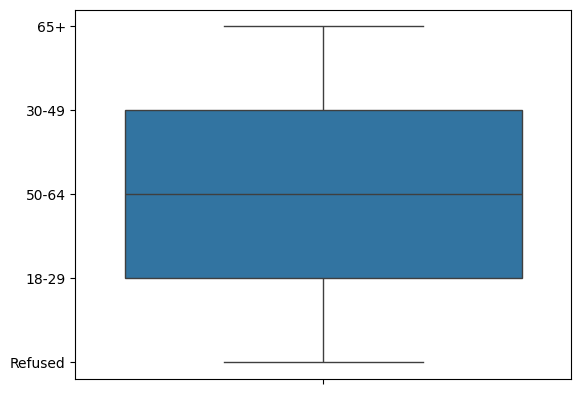

In [24]:
sns.boxplot(df_dropped['F_AGECAT'].unique())

In [25]:
# List of categorical variables
categorical_vars = ['TECH1_W99','SC1_W99',	'CNCEXC_W99',	'ALGFAIR_W99',	'DISCRIM1_a_W99',	'DISCRIM1_b_W99',	'DISCRIM1_c_W99',	'DISCRIM1_d_W99',	'DISCRIM1_e_W99',	'DISCRIM1_f_W99',	'F_AGECAT',	'F_GENDER',	'F_EDUCCAT2',	'F_RACETHNMOD',	'F_CITIZEN',	'DCARS1_W99',	'DCARS2_W99',	'DCARS3_W99',	'DCARS4_a_W99',	'DCARS4_b_W99',	'DCARS4_c_W99',	'DCARS4_d_W99',	'DCARS5_W99',	'DCARS6_W99',	'DCARS7_W99',	'DCARS8_a_W99',	'DCARS8_b_W99',	'DCARS8_c_W99',	'DCARS8_d_W99',	'DCARS9_W99',	'DCARS10_W99',	'DCARS11_a_W99',	'DCARS11_b_W99',	'DCARS11_c_W99',	'DCARS11_d_W99',	'DCARS12_W99',	'DCARS13_a_W99',	'DCARS13_b_W99',	'DCARS13_c_W99',	'DCARS13_d_W99',	'F_METRO','F_CDIVISION', 'F_MARITAL',	'F_RELIGCAT1',	'F_PARTY_FINAL',	'F_INC_TIER2']

#display the data types of the categorical variables
print(df_dropped[categorical_vars].dtypes)

TECH1_W99         object
SC1_W99           object
CNCEXC_W99        object
ALGFAIR_W99       object
DISCRIM1_a_W99    object
DISCRIM1_b_W99    object
DISCRIM1_c_W99    object
DISCRIM1_d_W99    object
DISCRIM1_e_W99    object
DISCRIM1_f_W99    object
F_AGECAT          object
F_GENDER          object
F_EDUCCAT2        object
F_RACETHNMOD      object
F_CITIZEN         object
DCARS1_W99        object
DCARS2_W99        object
DCARS3_W99        object
DCARS4_a_W99      object
DCARS4_b_W99      object
DCARS4_c_W99      object
DCARS4_d_W99      object
DCARS5_W99        object
DCARS6_W99        object
DCARS7_W99        object
DCARS8_a_W99      object
DCARS8_b_W99      object
DCARS8_c_W99      object
DCARS8_d_W99      object
DCARS9_W99        object
DCARS10_W99       object
DCARS11_a_W99     object
DCARS11_b_W99     object
DCARS11_c_W99     object
DCARS11_d_W99     object
DCARS12_W99       object
DCARS13_a_W99     object
DCARS13_b_W99     object
DCARS13_c_W99     object
DCARS13_d_W99     object


In [26]:
# Define the categorization function with corrections
def categorize_CARS(response):
    response = str(response).strip().lower()
    high_responses = ['a lot', 'definitely want', 'definitely would happen', 'very well', 'very comfortable', 'very positive', 'extremely comfortable', 'more acceptable', 'a major role']
    medium_responses = ['somewhat well', 'probably want', 'probably would happen', 'somewhat comfortable', 'probably not want', 'mostly positive', 'less acceptable', 'a minor role', 'a little', 'not too comfortable']
    low_responses = ['no difference', 'nothing at all', 'definitely not want', 'definitely would not happen', 'not too well', 'probably would not happen', 'not at all well', 'not comfortable at all', 'mostly negative', 'very negative', 'no difference', 'no role at all']
    uncertain_responses = ['not sure', 'don\'t know', 'no answer']

    if response in high_responses:
        return 'High'
    elif response in medium_responses:
        return 'Medium'
    elif response in low_responses:
        return 'Low'
    elif response in uncertain_responses:
        return 'Uncertain'
    else:
        return 'Unknown'

# List of columns to categorize
dcars_columns = ['DCARS1_W99', 'DCARS12_W99', 'DCARS11_a_W99',	'DCARS11_b_W99','DCARS11_c_W99',	'DCARS11_d_W99', 'DCARS8_a_W99',	'DCARS8_b_W99',	'DCARS8_c_W99',	'DCARS8_d_W99', 'DCARS4_a_W99',	'DCARS4_b_W99',	'DCARS4_c_W99',	'DCARS4_d_W99', 'DCARS3_W99']

# Check if the columns exist in the DataFrame before applying the function
existing_columns = [col for col in dcars_columns if col in df_dropped.columns]

# Apply the categorization function only to existing columns
df_dropped[existing_columns] = df_dropped[existing_columns].applymap(categorize_CARS)

# Display the first few rows to verify
print(df_dropped.head())

         TECH1_W99                              SC1_W99  \
0  Mostly positive                      Mostly positive   
1  Mostly positive                      Mostly positive   
2  Mostly positive                      Mostly positive   
3  Mostly positive                      Mostly positive   
4  Mostly positive  Equal positive and negative effects   

                      CNCEXC_W99   ALGFAIR_W99 DISCRIM1_a_W99 DISCRIM1_b_W99  \
0  Equally concerned and excited  Not possible   Not too well      Very well   
1    More excited than concerned      Possible      Very well   Not too well   
2  Equally concerned and excited  Not possible  Somewhat well  Somewhat well   
3  Equally concerned and excited  Not possible       Not sure       Not sure   
4  Equally concerned and excited      Not sure       Not sure       Not sure   

  DISCRIM1_c_W99 DISCRIM1_d_W99 DISCRIM1_e_W99 DISCRIM1_f_W99  ... F_AGECAT  \
0      Very well      Very well       Not sure       Not sure  ...      65+   
1   No

/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_21998/2522239481.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_dropped[existing_columns] = df_dropped[existing_columns].applymap(categorize_CARS)


In [27]:
df_dropped.head()

,TECH1_W99,SC1_W99,CNCEXC_W99,ALGFAIR_W99,DISCRIM1_a_W99,DISCRIM1_b_W99,DISCRIM1_c_W99,DISCRIM1_d_W99,DISCRIM1_e_W99,DISCRIM1_f_W99,...,F_AGECAT,F_GENDER,F_EDUCCAT2,F_RACETHNMOD,F_CITIZEN,F_MARITAL,F_RELIGCAT1,F_PARTY_FINAL,F_INC_TIER2,WEIGHT_W99
0,Mostly positive,Mostly positive,Equally concerned and excited,Not possible,Not too well,Very well,Very well,Very well,Not sure,Not sure,...,65+,A man,College graduate/some post grad,White non-Hispanic,Yes,Never been married,Unaffiliated,Republican,Middle income,0.206396
1,Mostly positive,Mostly positive,More excited than concerned,Possible,Very well,Not too well,Not too well,Not sure,Somewhat well,Very well,...,65+,A man,"Some college, no degree",White non-Hispanic,Yes,Divorced,Protestant,Republican,Middle income,0.315090
2,Mostly positive,Mostly positive,Equally concerned and excited,Not possible,Somewhat well,Somewhat well,Somewhat well,Somewhat well,Very well,Somewhat well,...,30-49,A woman,Postgraduate,White non-Hispanic,Yes,Married,Catholic,Democrat,Upper income,0.829579
3,Mostly positive,Mostly positive,Equally concerned and excited,Not possible,Not sure,Not sure,Not sure,Not sure,Not sure,Not sure,...,50-64,A woman,Postgraduate,White non-Hispanic,Yes,Married,Protestant,Republican,Upper income,0.337527
4,Mostly positive,Equal positive and negative effects,Equally concerned and excited,Not sure,Not sure,Not sure,Not sure,Not sure,Very well,Not sure,...,65+,A woman,Associate's degree,White non-Hispanic,Yes,Married,Protestant,Independent,Lower income,1.210606


In [28]:
df_dropped['DCARS12_W99'].unique()

array(['Medium', 'High', 'Low', 'Unknown'], dtype=object)

In [29]:
# Convert all values in the categorical columns to strings
#for column in categorical_vars:
#    df_dropped[column] = df_dropped[column].astype(str)

# Create a mapping dictionary dynamically
#mapping_dict = {}
#for column in categorical_vars:
#    unique_values = sorted(df_dropped[column].unique())
#    mapping_dict[column] = {value: idx + 1 for idx, value in enumerate(unique_values)}

# Define a function to map and convert columns
#def map_and_convert(df, column, mapping):
#    df_dropped[column] = df_dropped[column].map(mapping)
#    df_dropped[column] = pd.to_numeric(df[column])

# Loop through the categorical variables and apply the mapping
#for column in categorical_vars:
#    map_and_convert(df_dropped, column, mapping_dict[column])

# Save the new dataset with the encoded columns
#df_dropped.to_csv('https://docs.google.com/spreadsheets/d/1ph9qcAk_hZsUnVWmDIBgs5NF-9iX4uP3/export?format=csv', index=False)

In [30]:
#df_dropped.head()

In [31]:
#display the data types of the categorical variables
print(df_dropped[categorical_vars].dtypes)

TECH1_W99         object
SC1_W99           object
CNCEXC_W99        object
ALGFAIR_W99       object
DISCRIM1_a_W99    object
DISCRIM1_b_W99    object
DISCRIM1_c_W99    object
DISCRIM1_d_W99    object
DISCRIM1_e_W99    object
DISCRIM1_f_W99    object
F_AGECAT          object
F_GENDER          object
F_EDUCCAT2        object
F_RACETHNMOD      object
F_CITIZEN         object
DCARS1_W99        object
DCARS2_W99        object
DCARS3_W99        object
DCARS4_a_W99      object
DCARS4_b_W99      object
DCARS4_c_W99      object
DCARS4_d_W99      object
DCARS5_W99        object
DCARS6_W99        object
DCARS7_W99        object
DCARS8_a_W99      object
DCARS8_b_W99      object
DCARS8_c_W99      object
DCARS8_d_W99      object
DCARS9_W99        object
DCARS10_W99       object
DCARS11_a_W99     object
DCARS11_b_W99     object
DCARS11_c_W99     object
DCARS11_d_W99     object
DCARS12_W99       object
DCARS13_a_W99     object
DCARS13_b_W99     object
DCARS13_c_W99     object
DCARS13_d_W99     object


In [32]:
#df_dropped.describe()

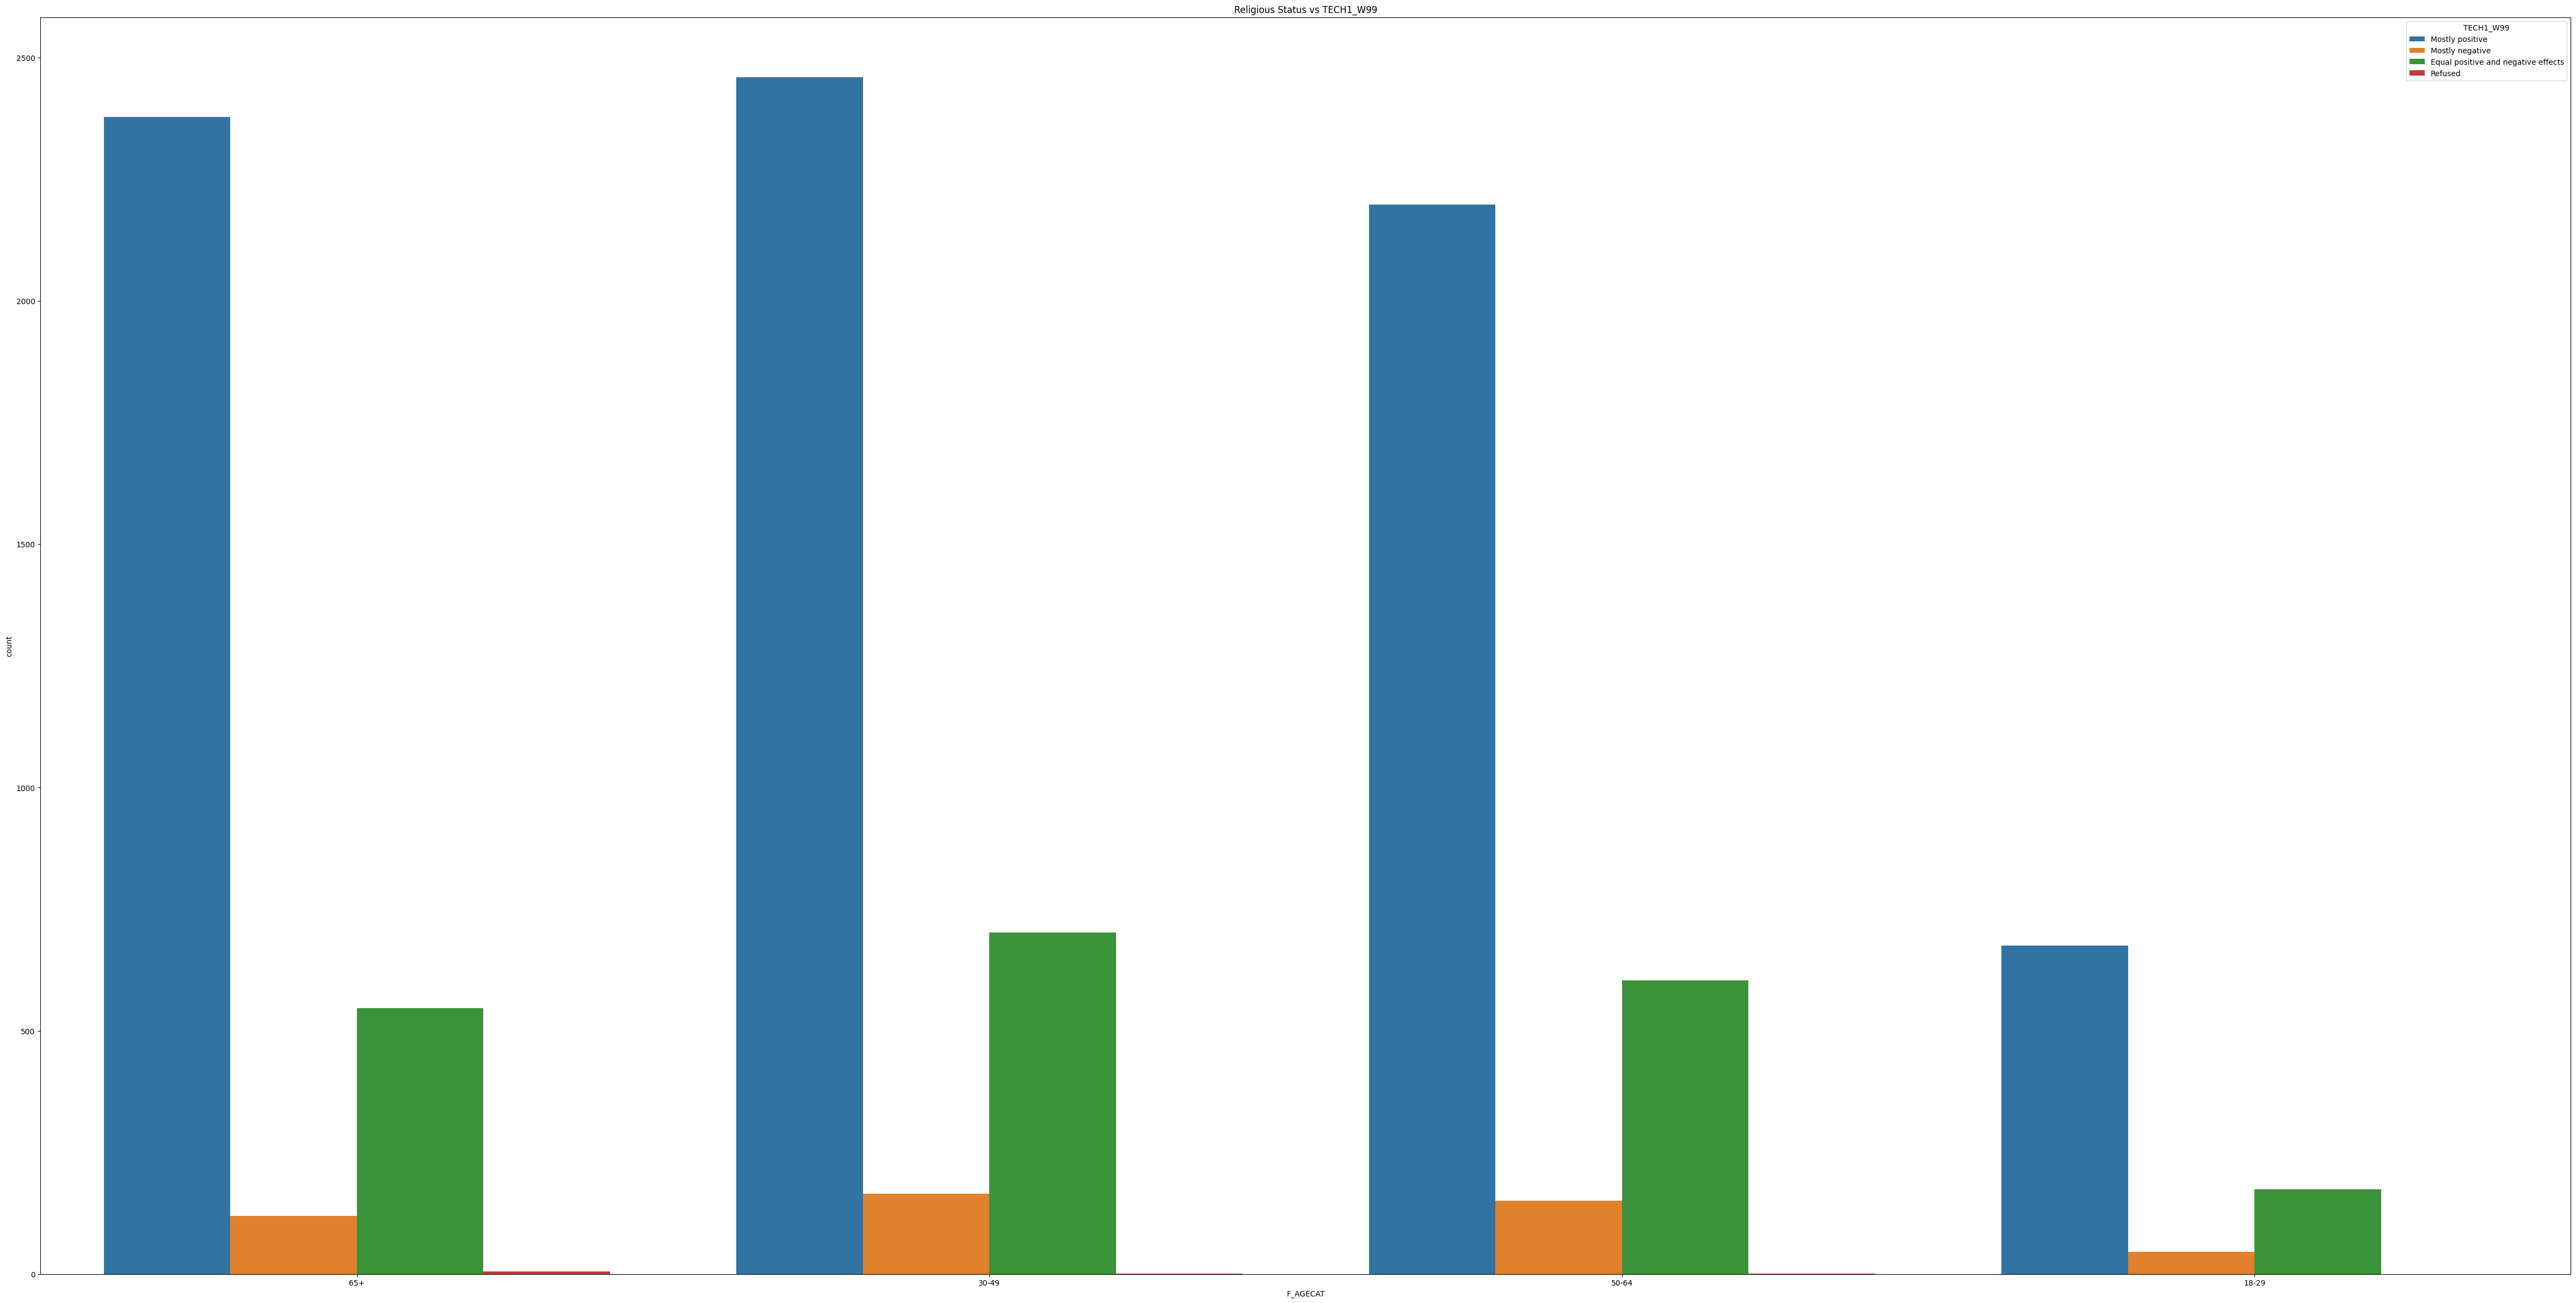

In [39]:
#create a displot of tech1_w99 and the categorical vars
#visualisation of the age and tech1_w99
df_filtered = df_dropped[df_dropped['F_AGECAT'] != 'Refused']
plt.figure(figsize=(60, 30))
sns.countplot(data=df_filtered, x='F_AGECAT', hue='TECH1_W99')
plt.title("Religious Status vs TECH1_W99")
plt.show()

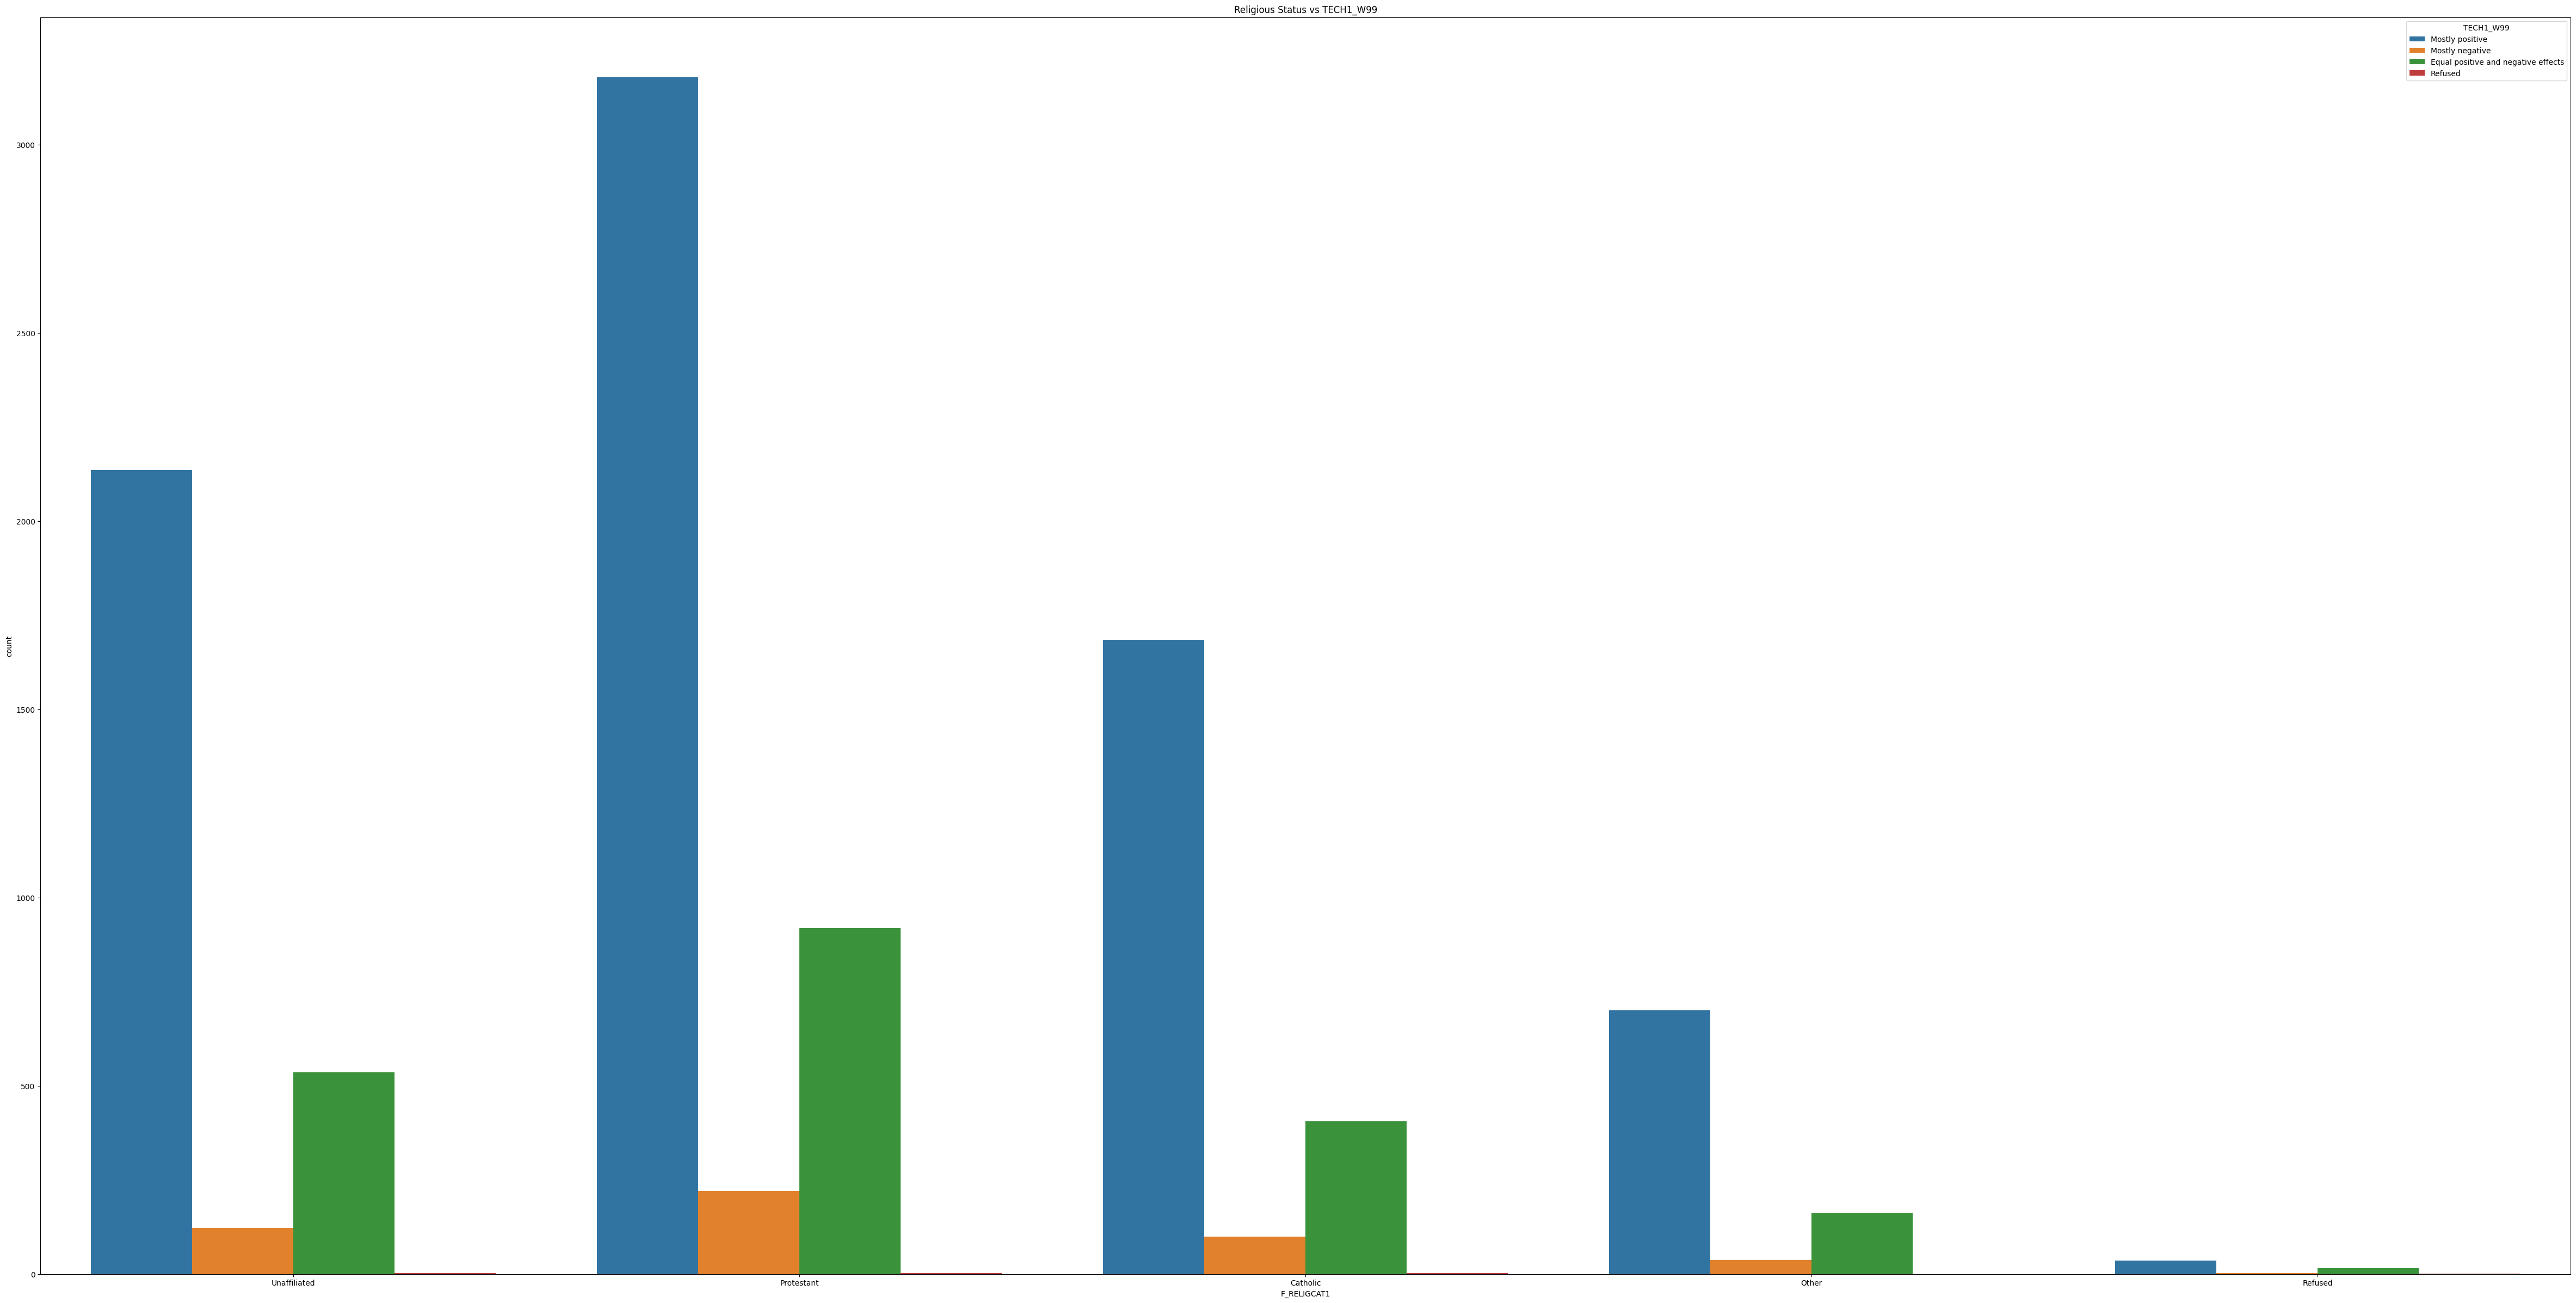

In [40]:
#visualisation of the religous status and tech1_w99
plt.figure(figsize=(60, 30))
sns.countplot(data=df_dropped, x='F_RELIGCAT1', hue='TECH1_W99')
plt.title("Religious Status vs TECH1_W99")
plt.show()

In [41]:
df_dropped["F_RELIGCAT1"].unique()

array(['Unaffiliated', 'Protestant', 'Catholic', 'Other', 'Refused'],
      dtype=object)

In [42]:

# List of columns to categorize
dcars_columns = [col for col in df_filtered.columns if col.startswith('DCARS')]
# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_RELIGCAT1','F_RACETHNMOD','F_CITIZEN','F_EDUCCAT2','F_MARITAL','F_PARTY_FINAL']



# Create a summary of DCARS responses by demographic groups
summary = df_filtered.groupby(demographic_columns)[dcars_columns].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
print(summary)

                                                                                                                                          DCARS1_W99  \
F_AGECAT F_GENDER F_INC_TIER2  F_RELIGCAT1 F_RACETHNMOD       F_CITIZEN F_EDUCCAT2                      F_MARITAL          F_PARTY_FINAL               
18-29    A man    Lower income Catholic    Asian non-Hispanic Yes       Associate's degree              Married            Democrat           Medium   
                                           Hispanic           No        Associate's degree              Never been married Democrat           Medium   
                                                                        Postgraduate                    Never been married Democrat             High   
                                                                        Some college, no degree         Never been married Democrat              Low   
                                                              Yes       College graduate

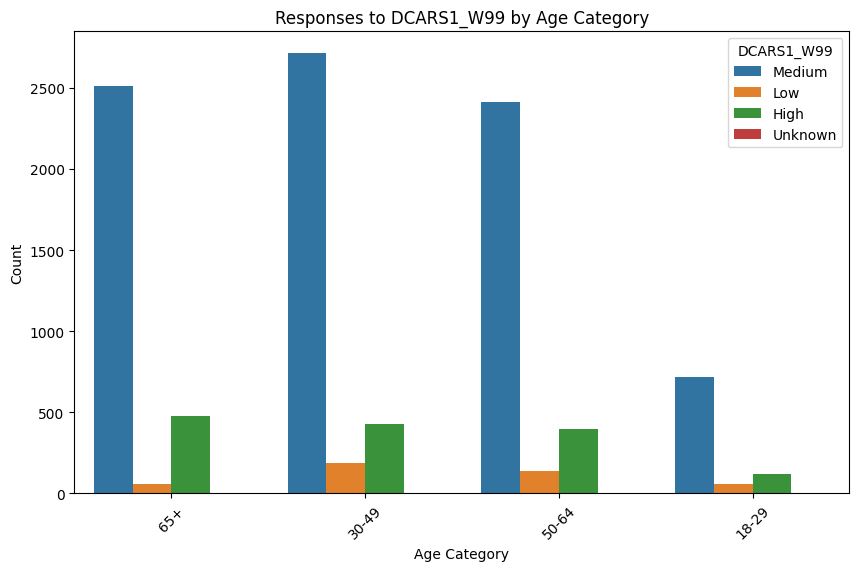

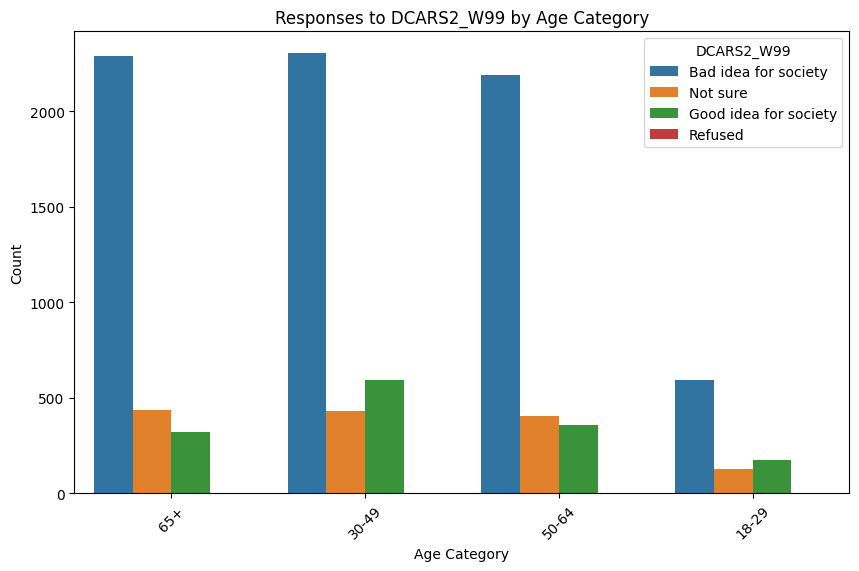

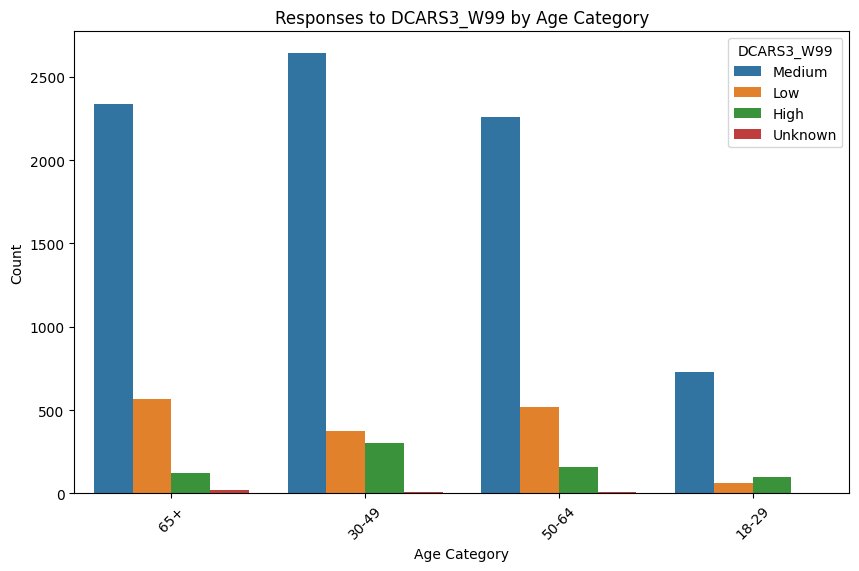

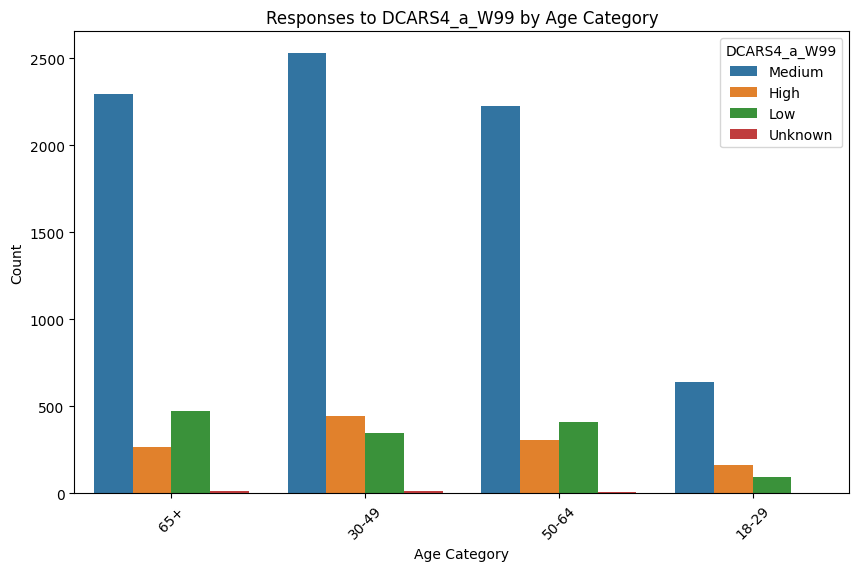

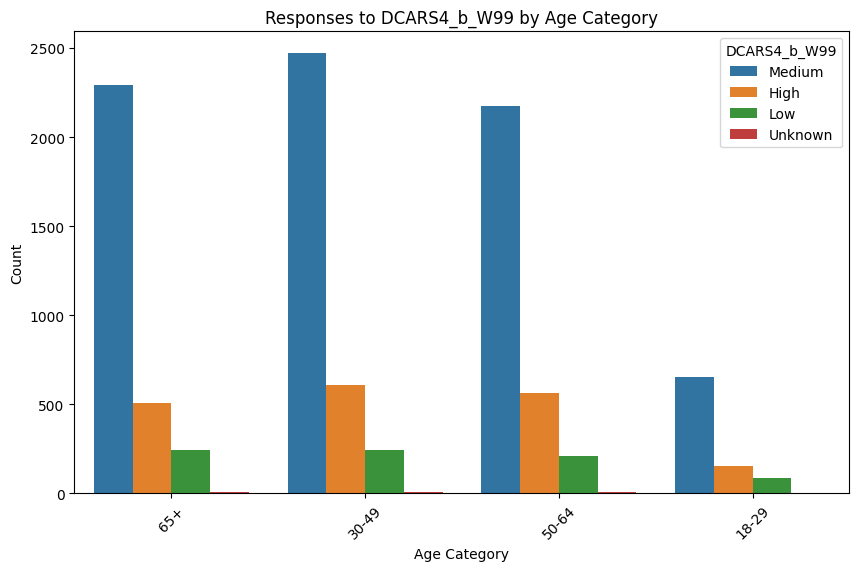

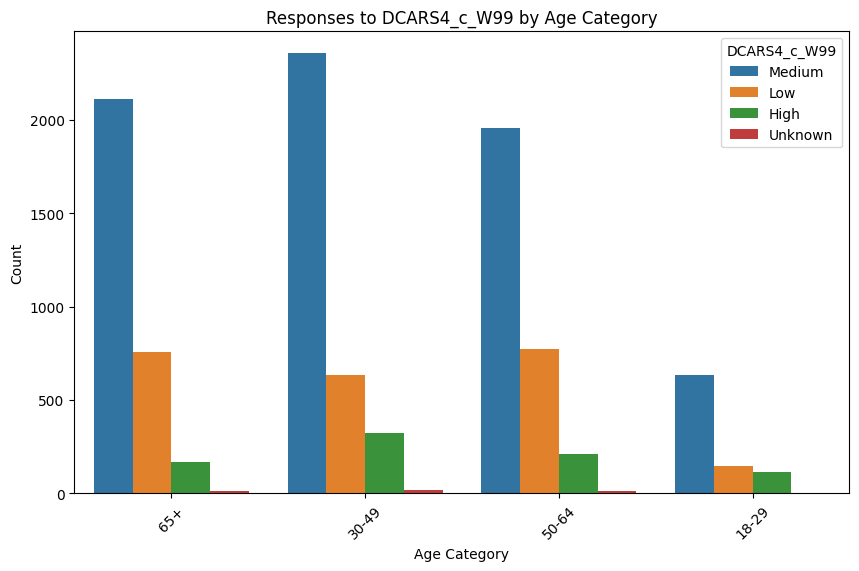

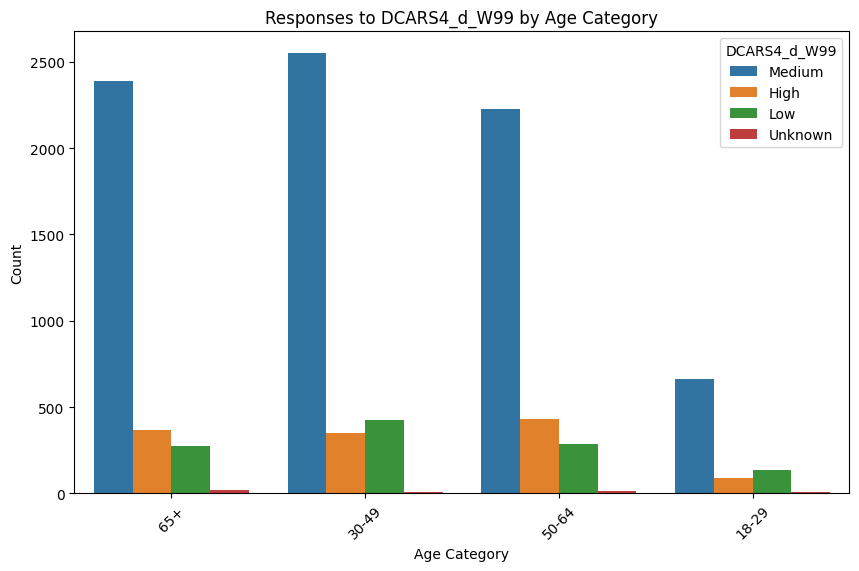

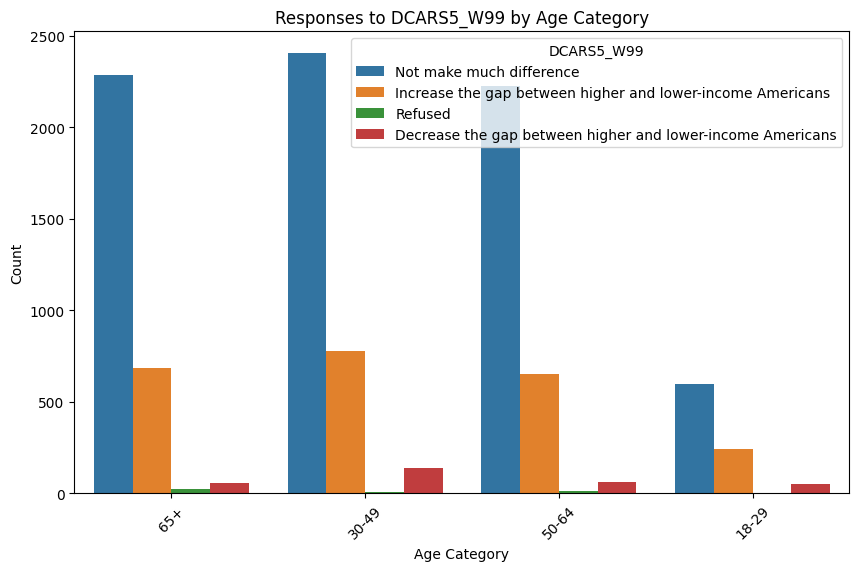

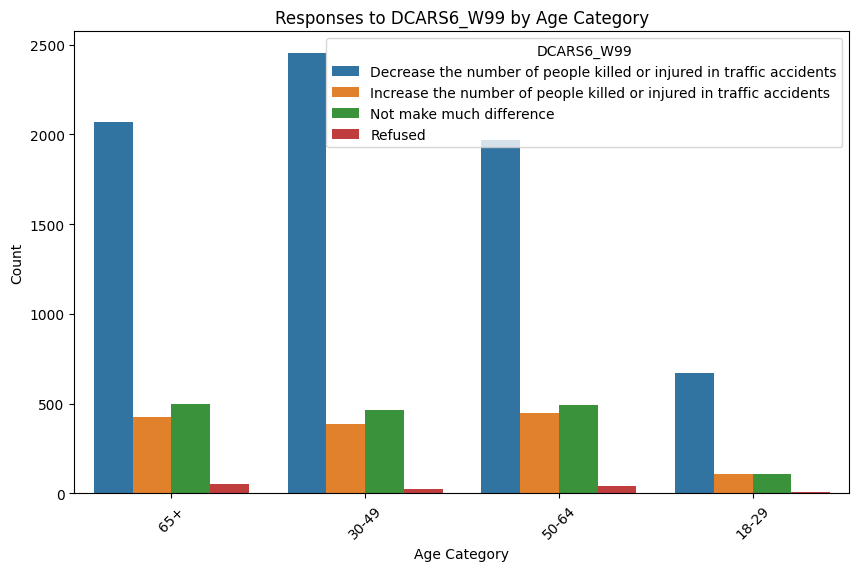

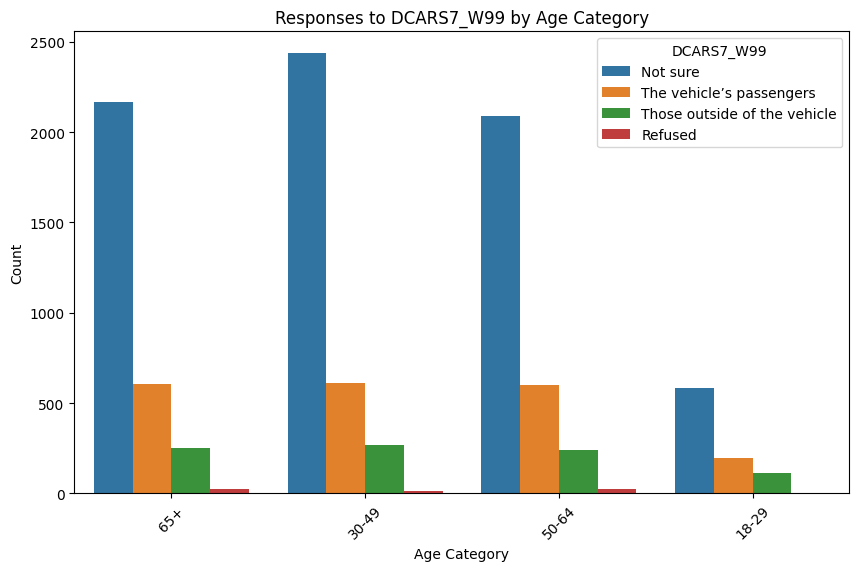

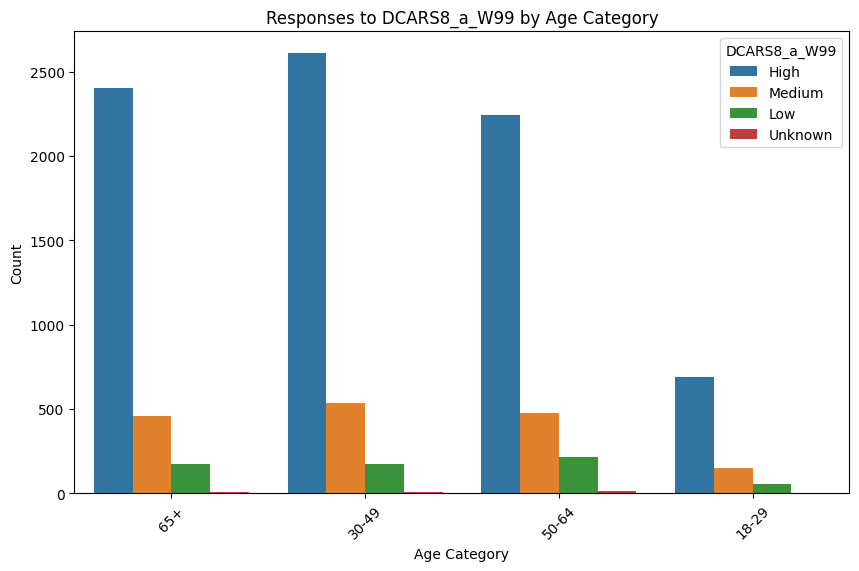

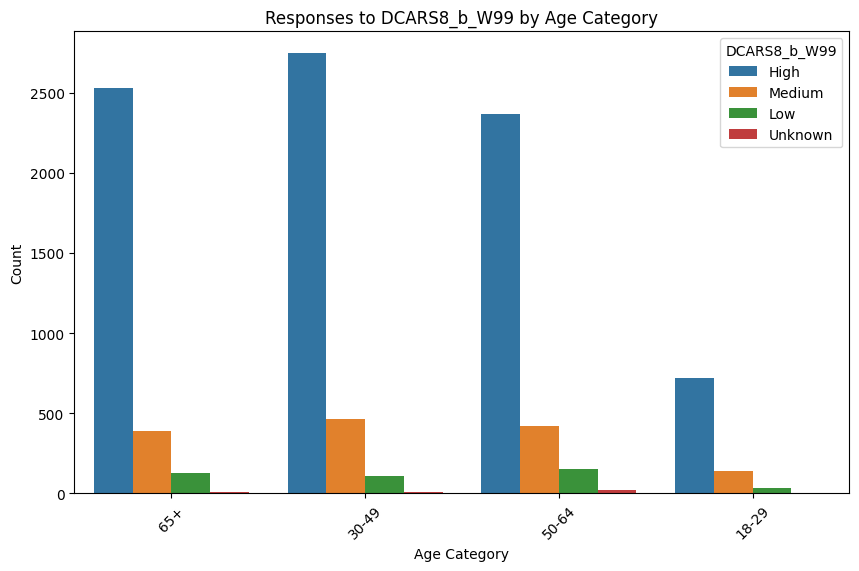

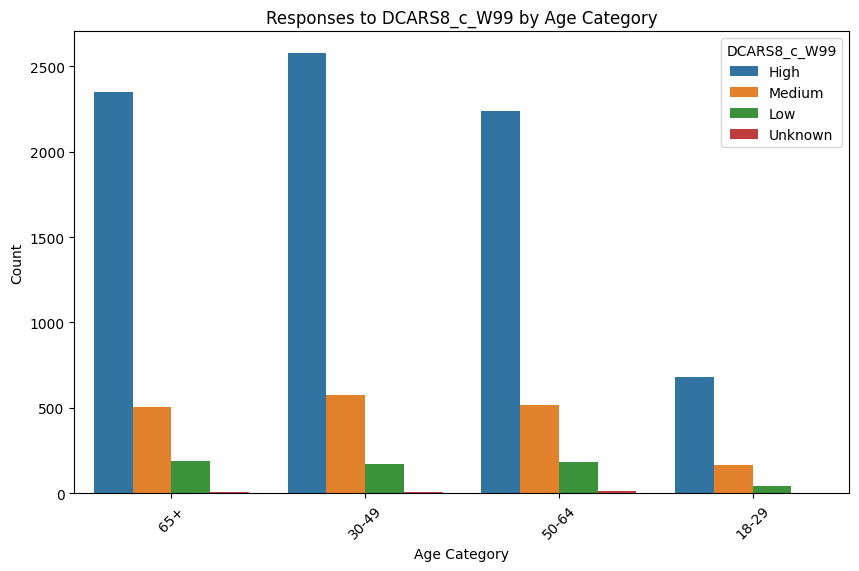

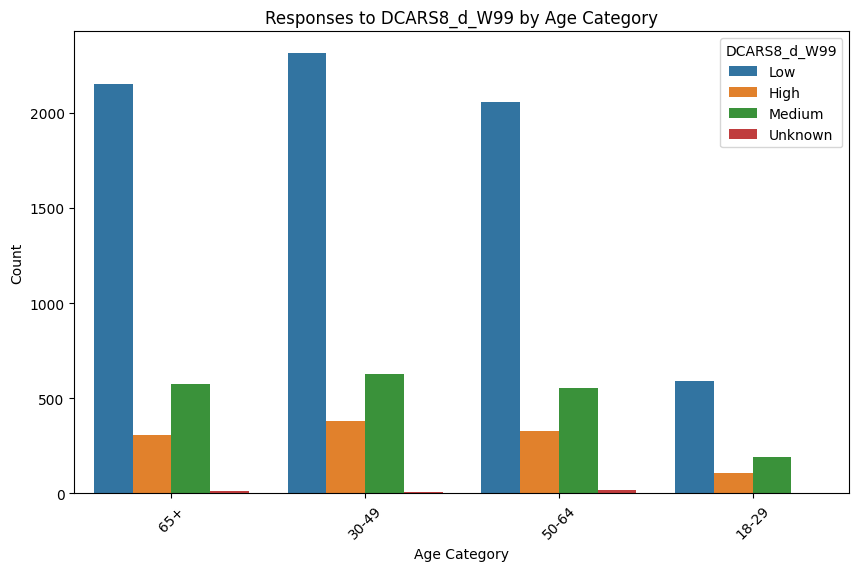

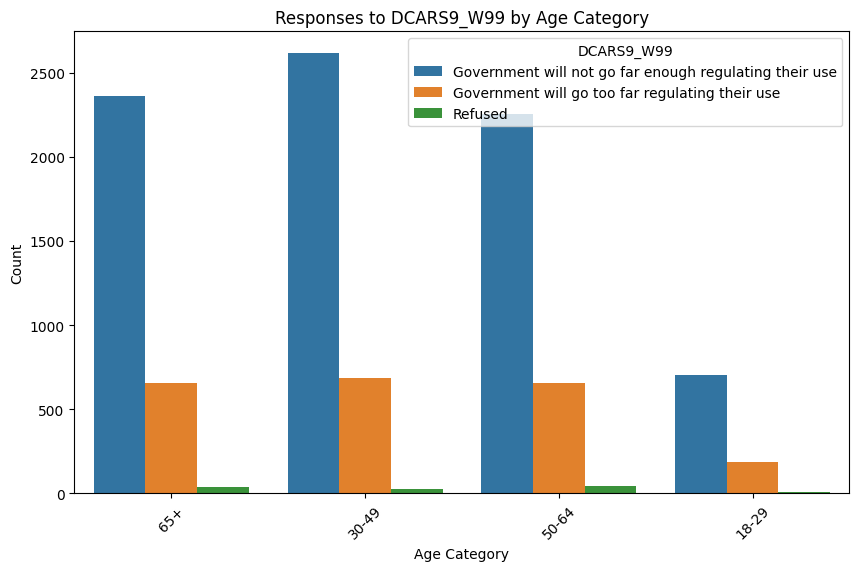

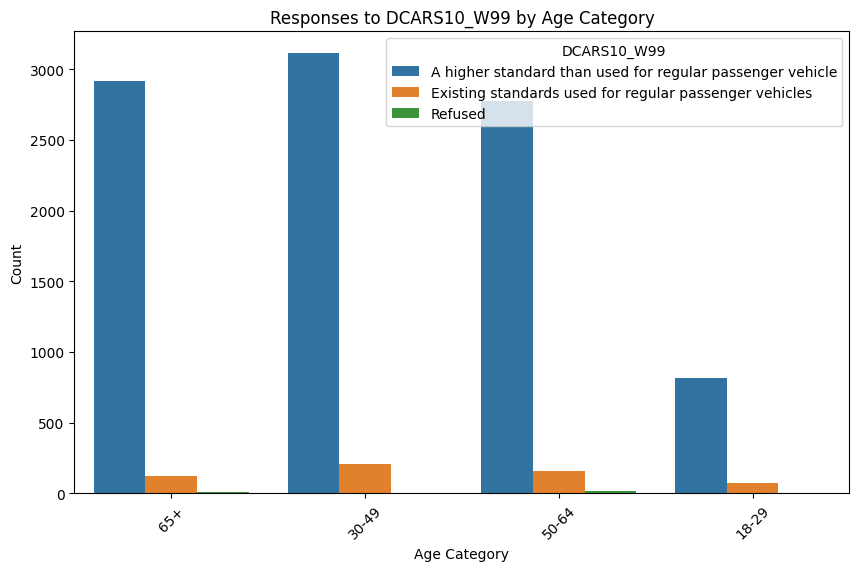

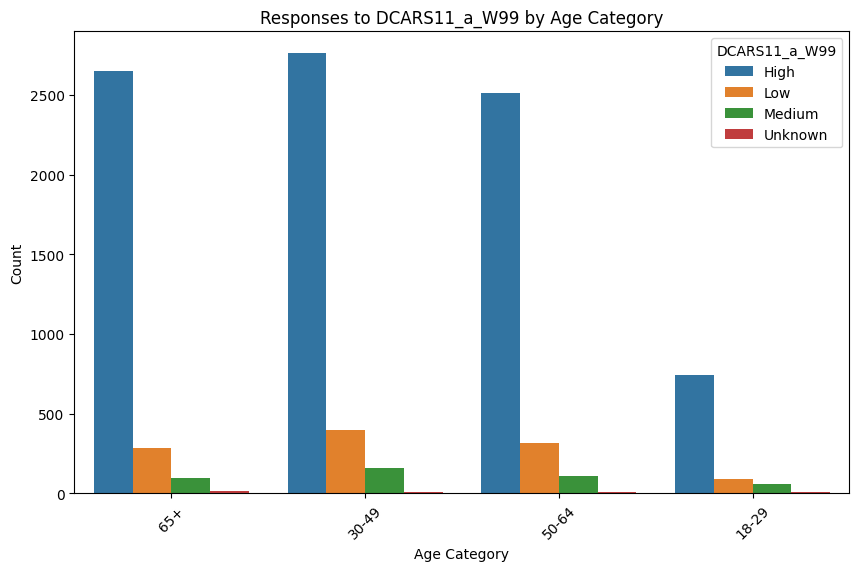

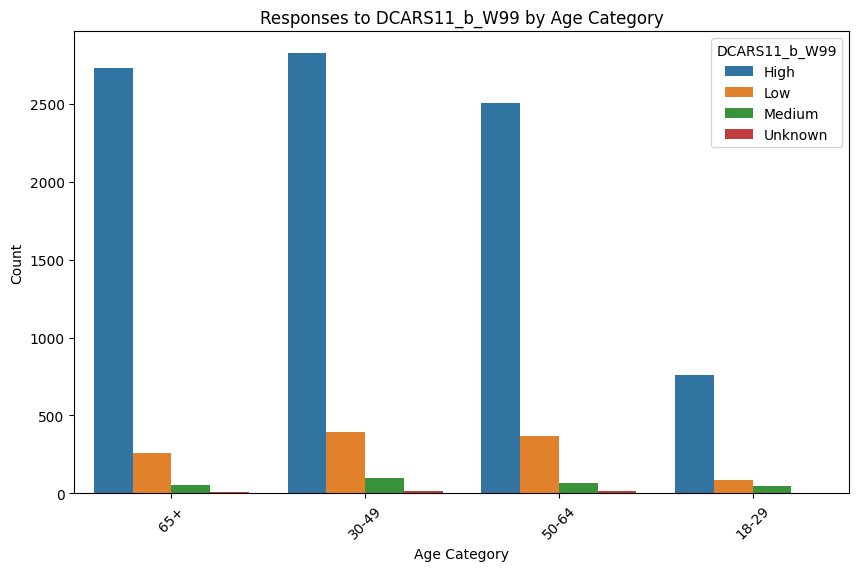

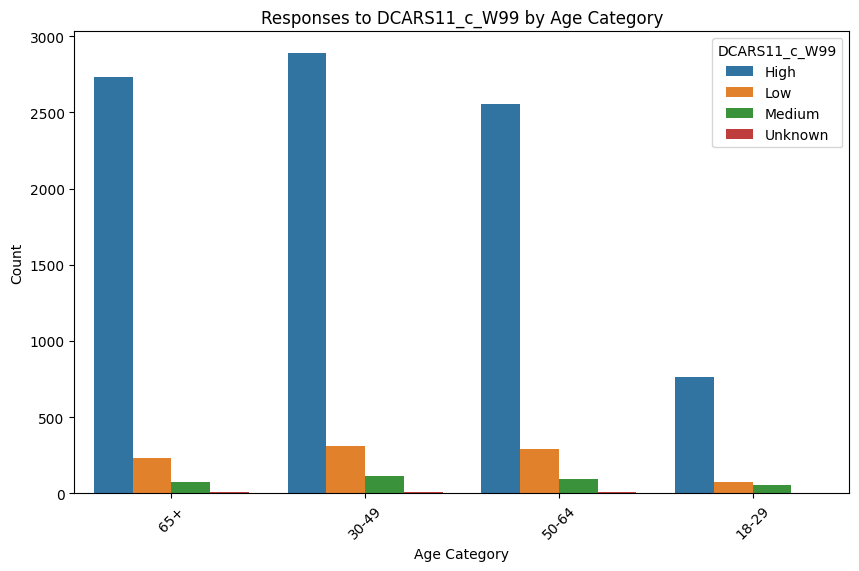

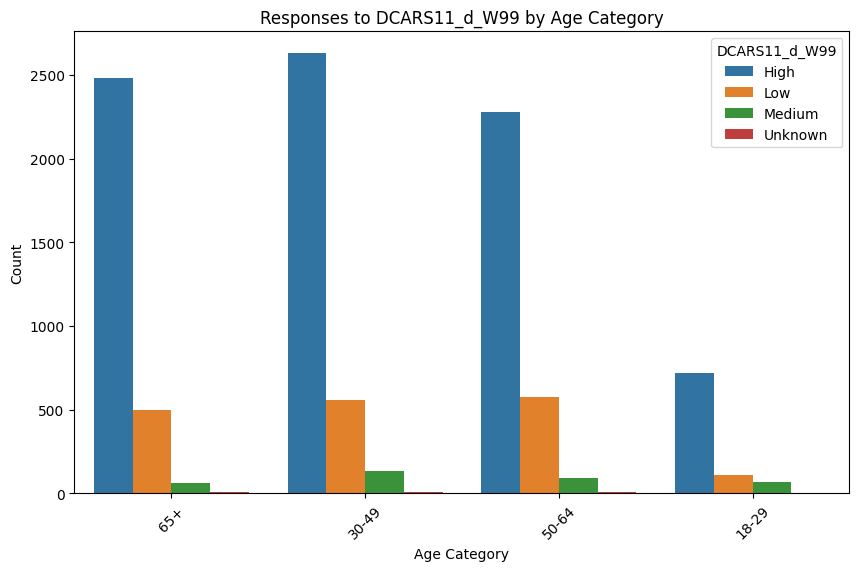

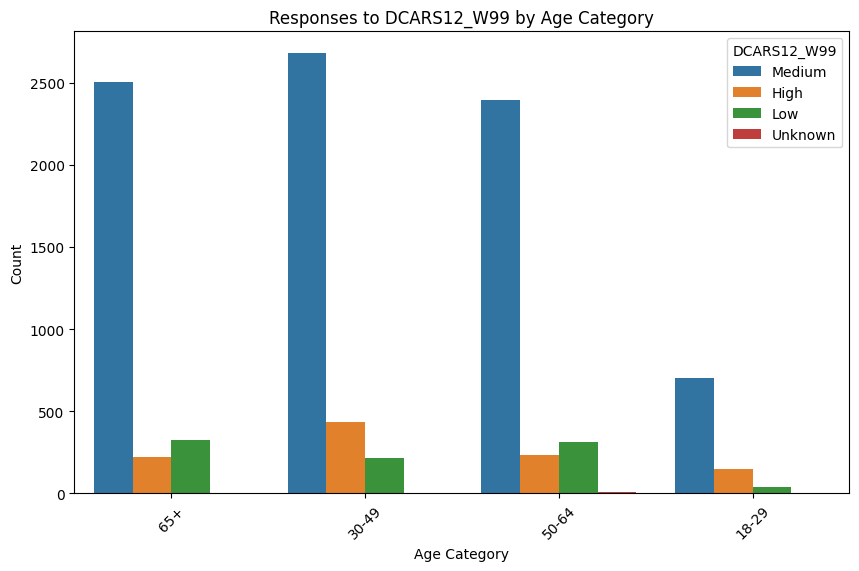

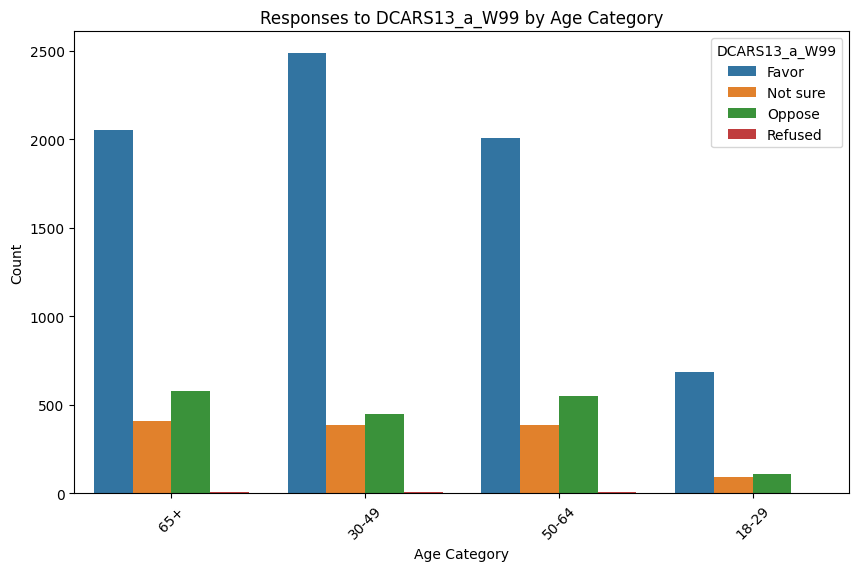

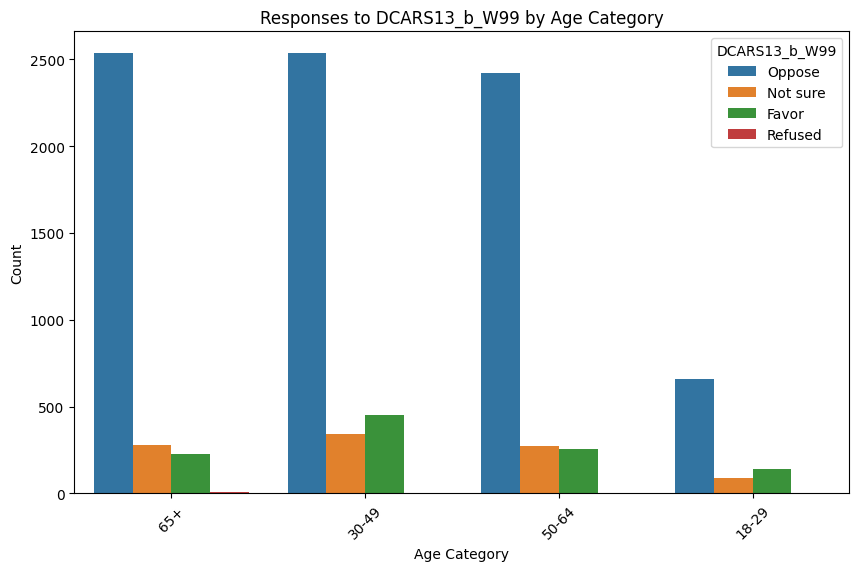

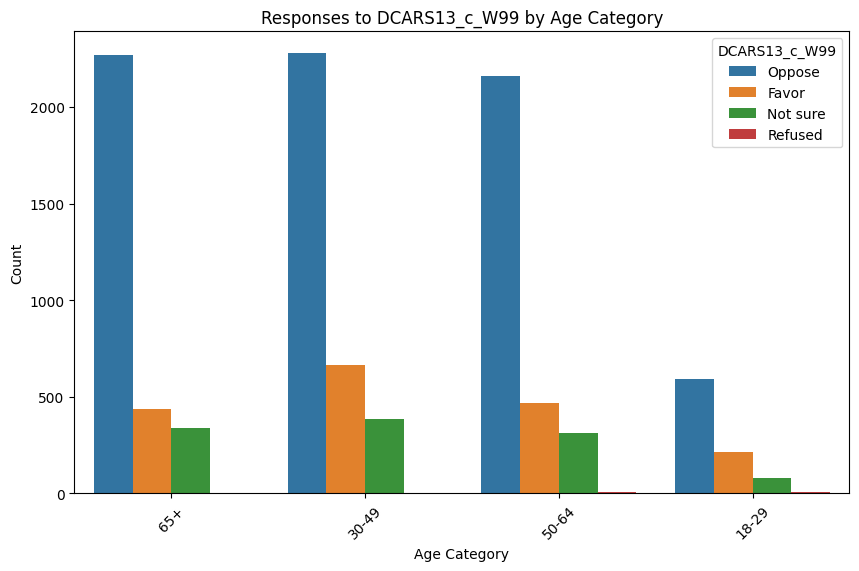

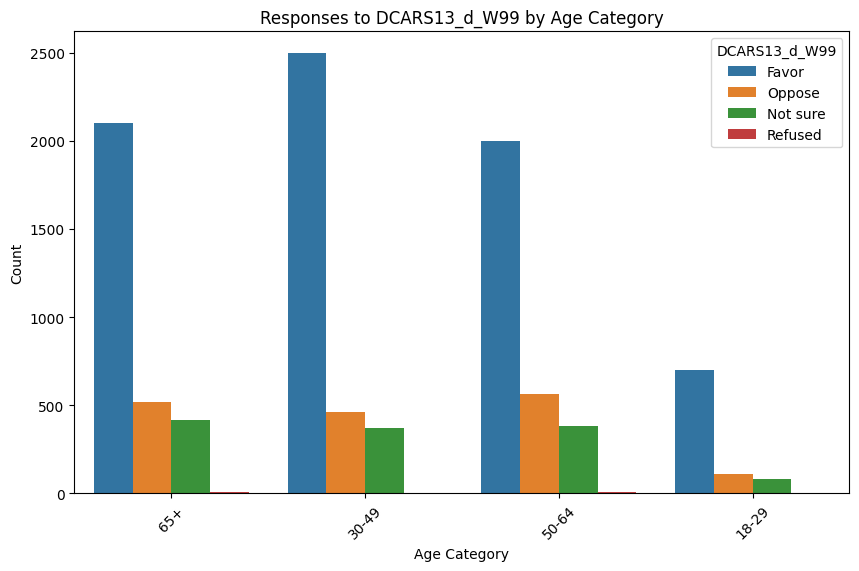

In [43]:
# List of columns to categorize
dcars_columns = [col for col in df_filtered.columns if col.startswith('DCARS')]

# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_REG', 'F_RACETHNMOD', 'F_CITIZEN', 'F_EDUCCAT2', 'F_MARITAL', 'F_PARTY_FINAL']

for col in dcars_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_filtered, x='F_AGECAT', hue=col)
    plt.title(f'Responses to {col} by Age Category')
    plt.xlabel('Age Category')
    plt.ylabel('Count')
    plt.legend(title=col)
    plt.xticks(rotation=45)
    plt.show()
#DCARS1 How much have you heard or read about driverless passenger vehicles?
#DCARS2 Do you think widespread use of driverless passenger vehicles would be a…
#DCARS3 Would you personally want to ride in a driverless passenger vehicle, if you had the opportunity?
#DCARS4 If the use of driverless passenger vehicles becomes widespread, do you think each of the following would happen? [RANDOMIZE ITEMS]
#   a. Older adults and people with disabilities will be able to live more independently
#   b. Many people who make their living by driving others or delivering things with passenger vehicles would lose their jobs
#   c. Getting from place to place would be less stressful
#   d. The computer systems in driverless
#DCARS5 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS6 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS7 In the case of an unavoidable accident, should the computer systems guiding driverless vehicles be designed to prioritize the safety of…
#DCARS8 How much of a role do you think each of the following groups should have in setting standards for how driverless passenger vehicles are used?
#   a. Federal government agencies
#   b The companies that develop driverless passenger vehicles
#   c. The people who use driverless passenger vehicles
#   d. The dealerships that sell driverless passenger vehicles
#DCARS9 If the use of driverless passenger vehicles becomes widespread, which is your greater concern?
#DCARS10 Which statement comes closer to your view when it comes to ensuring the safety and effectiveness of driverless passenger vehicles?
#DCARS11 Would the use of driverless passenger vehicles be more acceptable, less acceptable or would it make no difference in each of the following circumstances?
#DCARS12 If the use of driverless passenger vehicles became widespread, how comfortable would you feel sharing the road with them?
#DCARS13 The technology used to operate driverless passenger vehicles could be used for a number of purposes. Would you favor or oppose the use of this technology in each of the following purposes?
#   a. Taxis and ride-sharing vehicles
#   b. 18-wheeler trucks
#   c. Buses for public transportation
#   d. Delivery vehicles


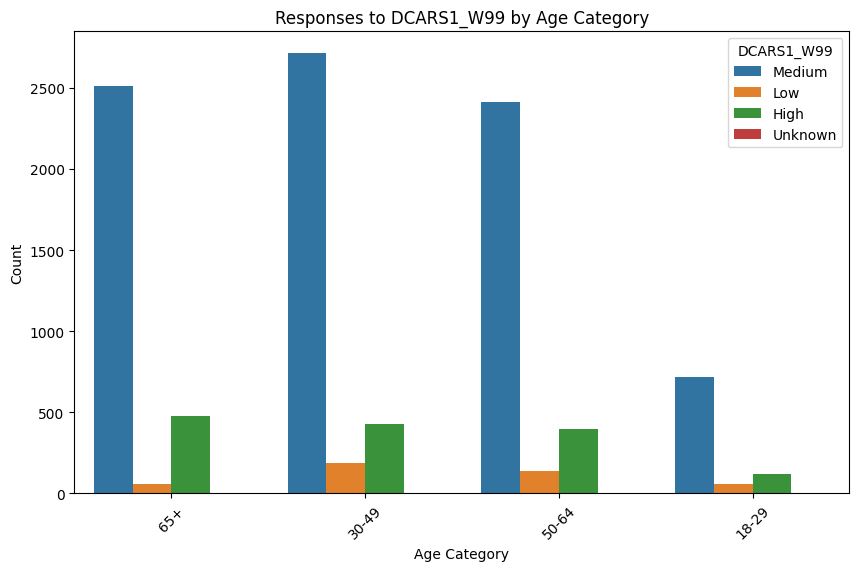

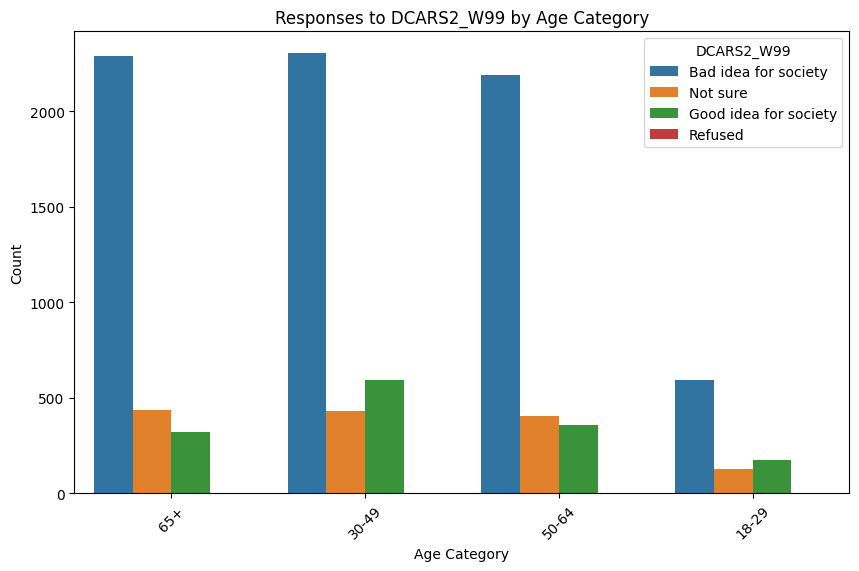

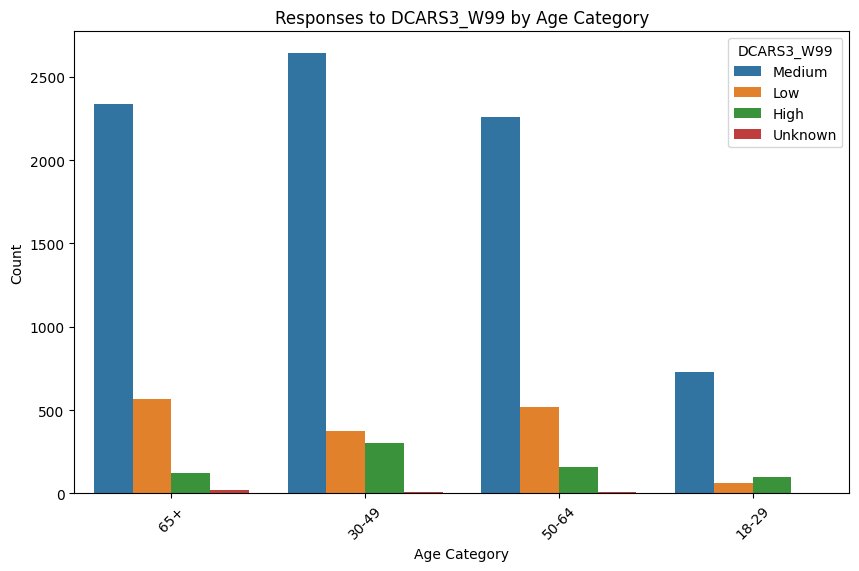

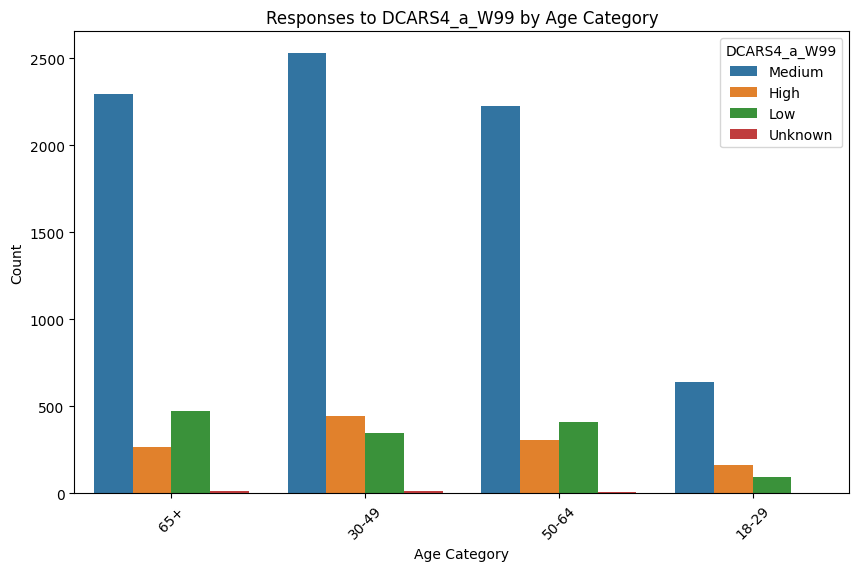

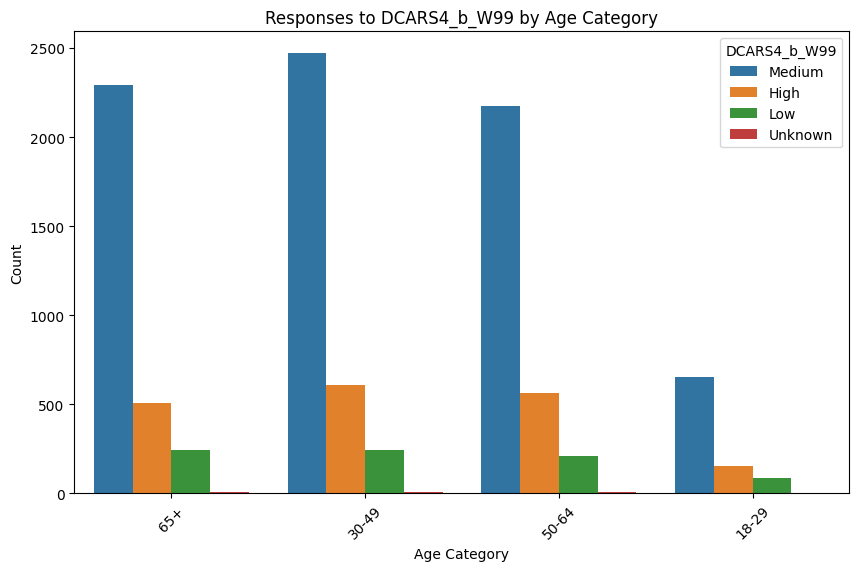

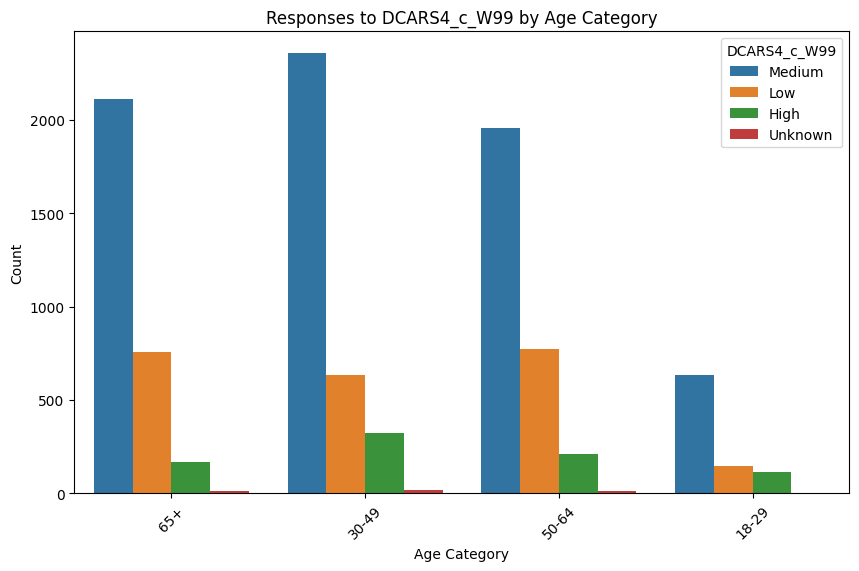

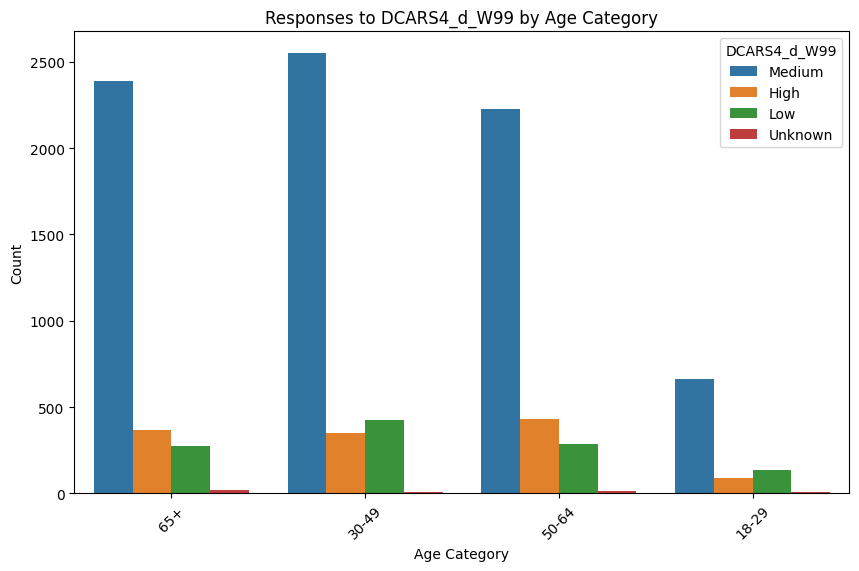

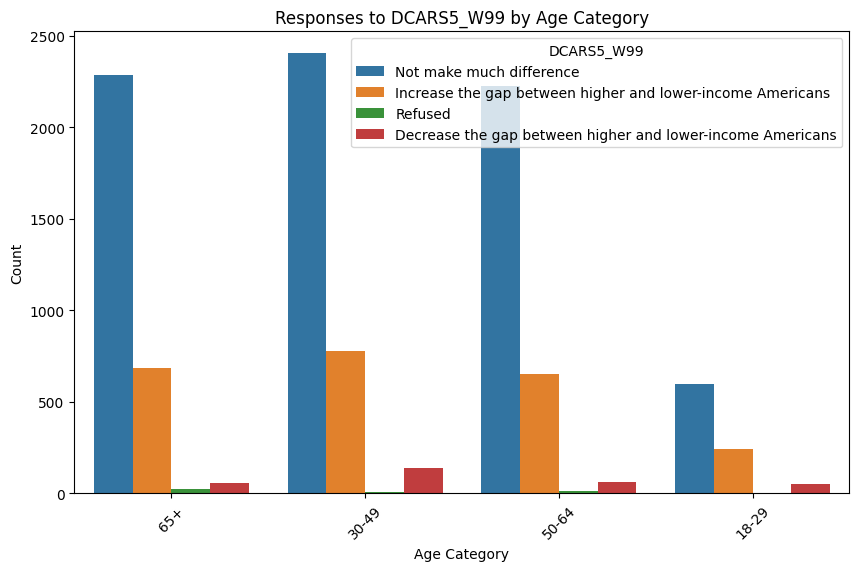

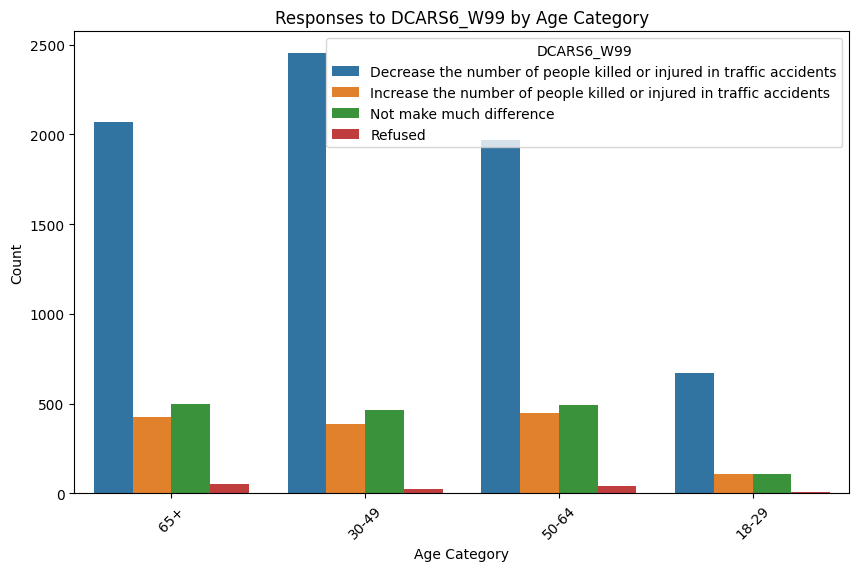

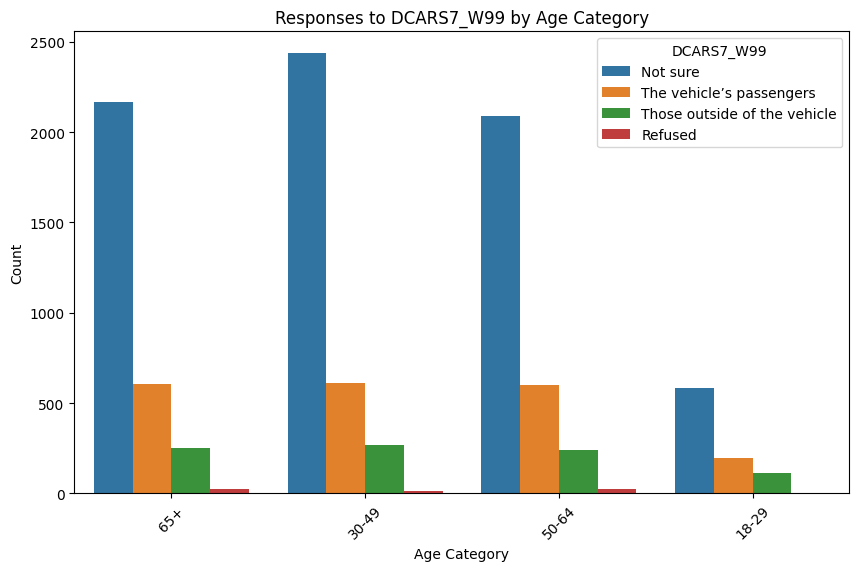

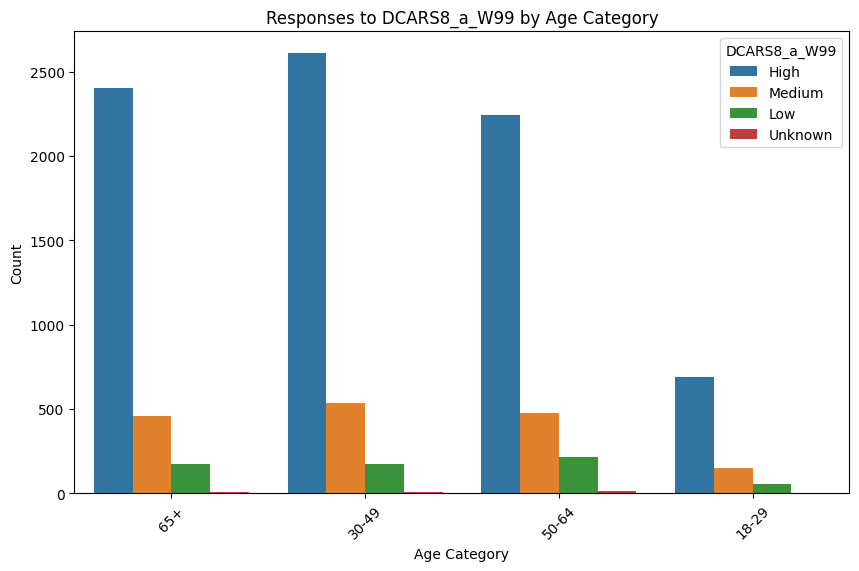

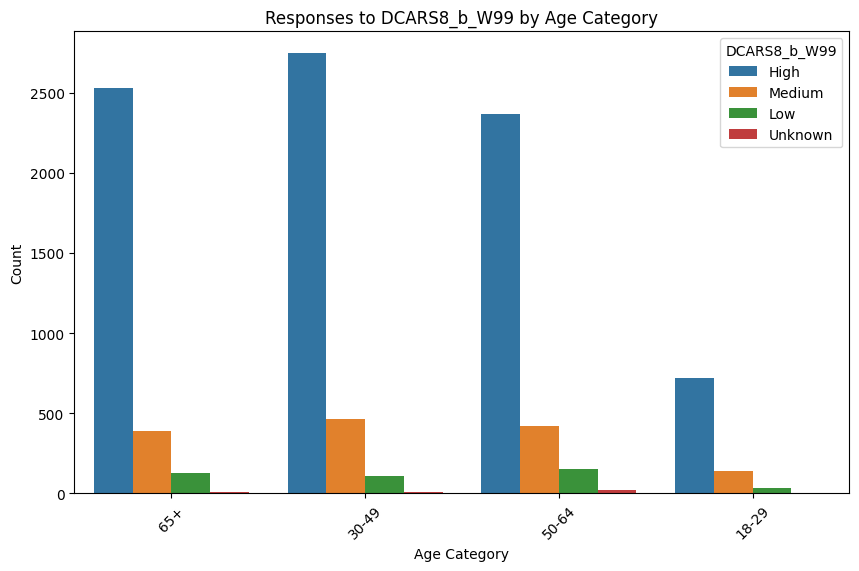

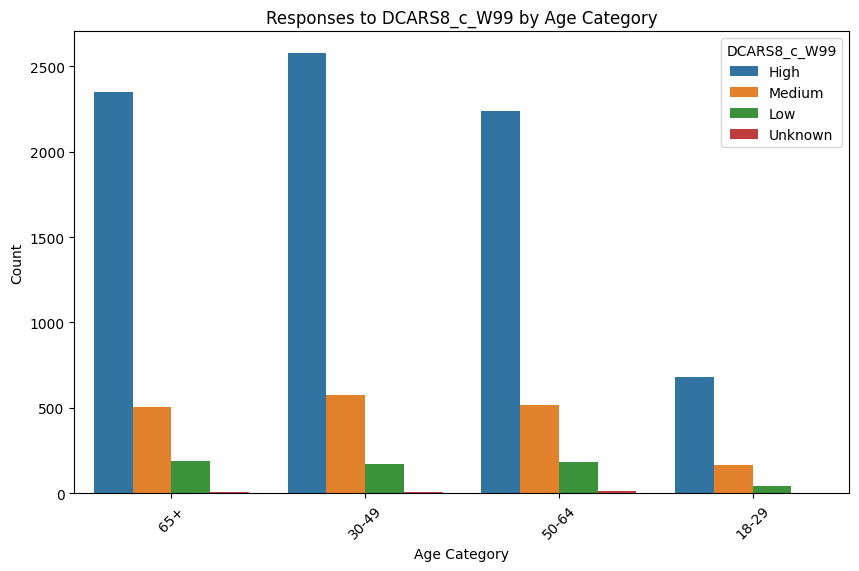

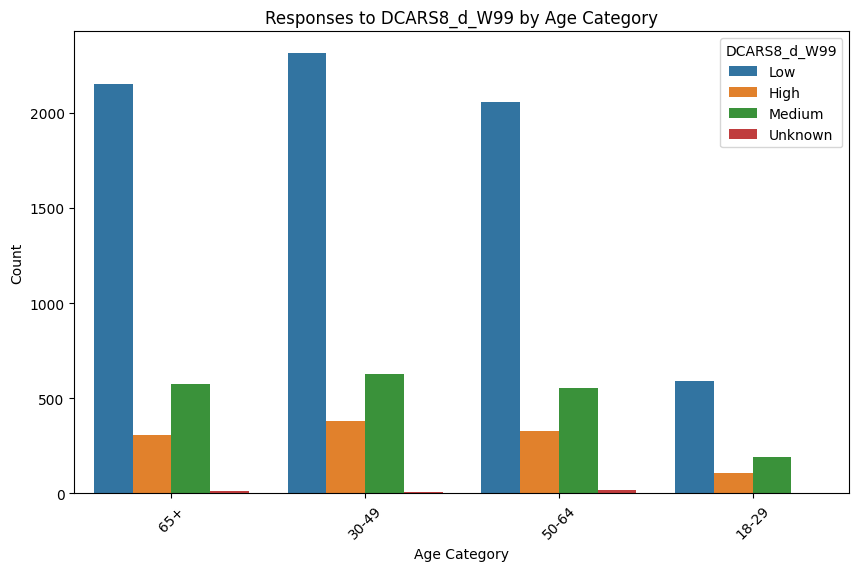

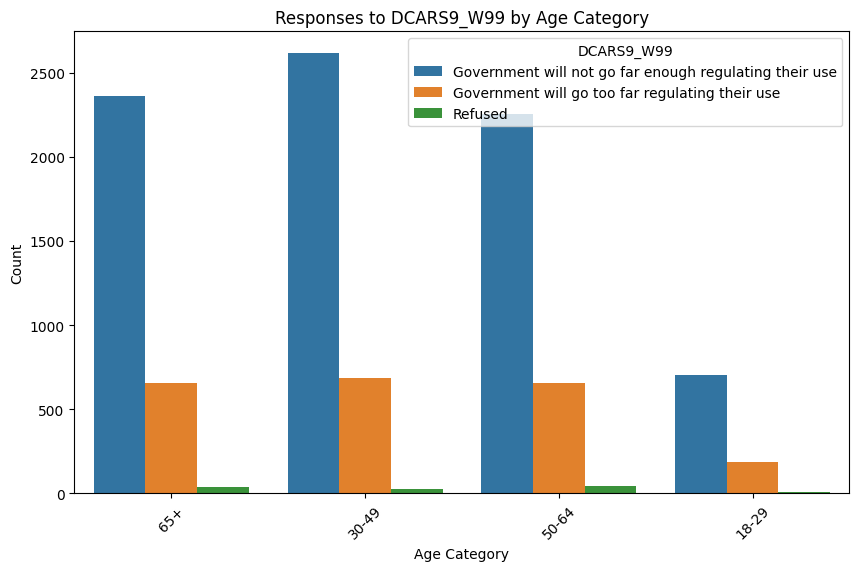

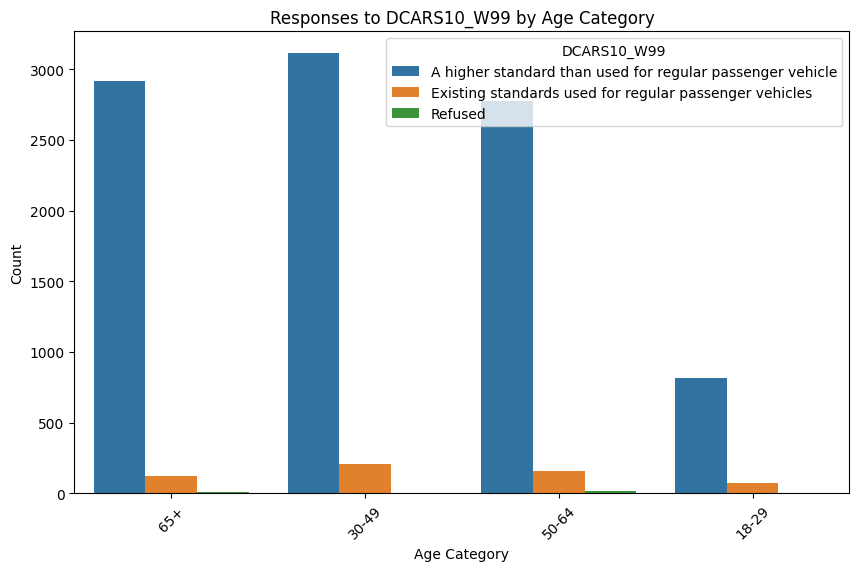

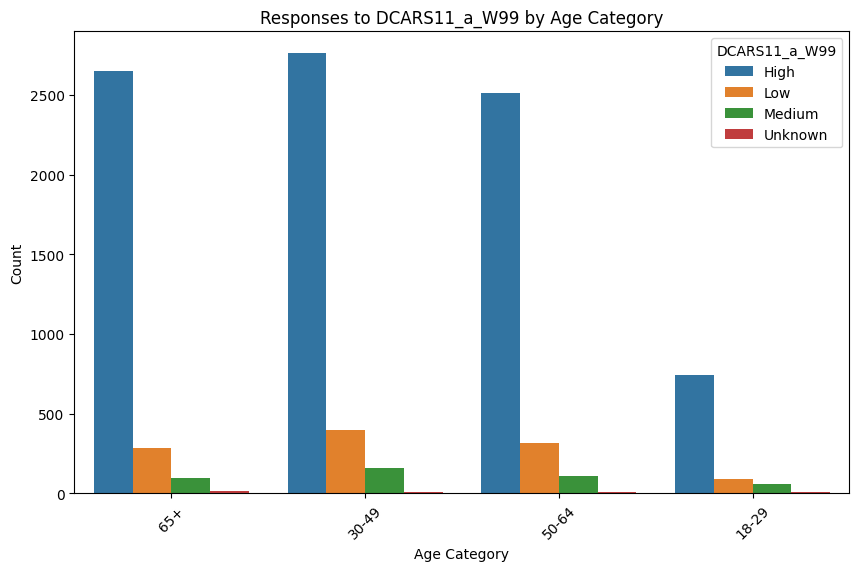

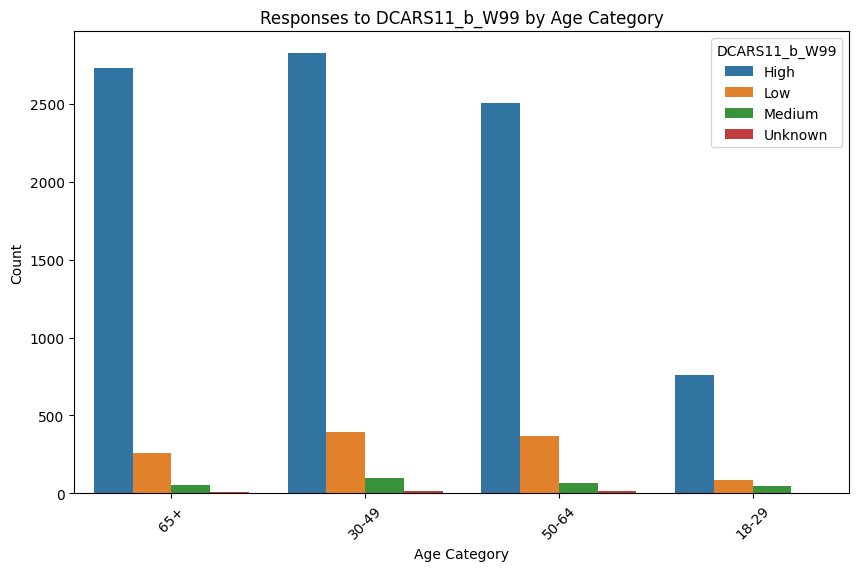

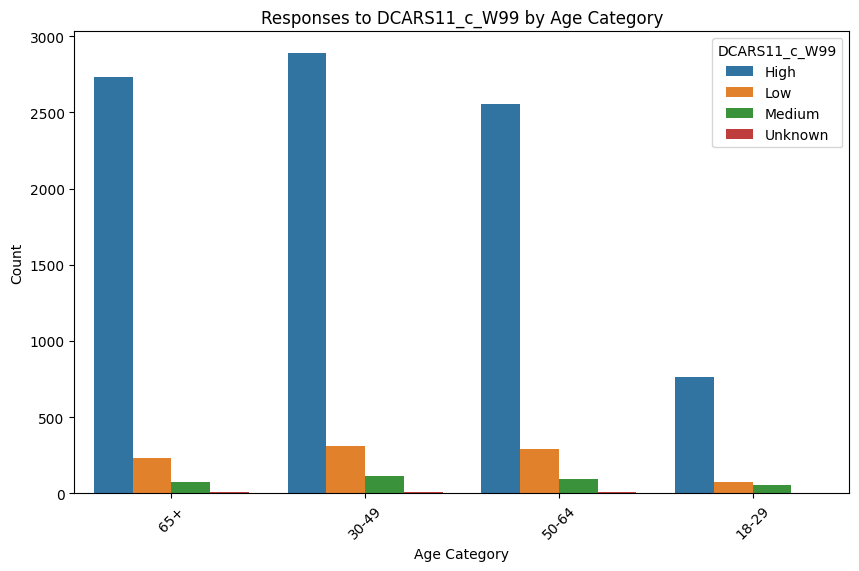

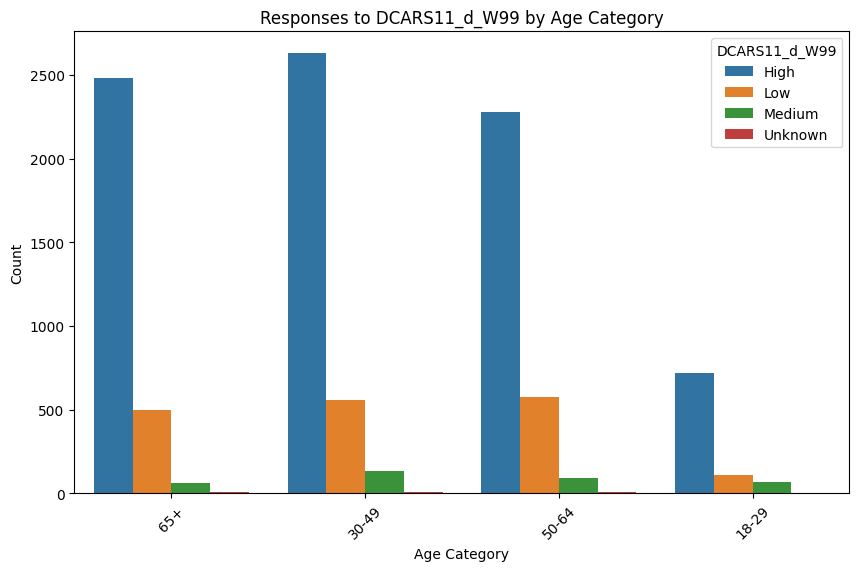

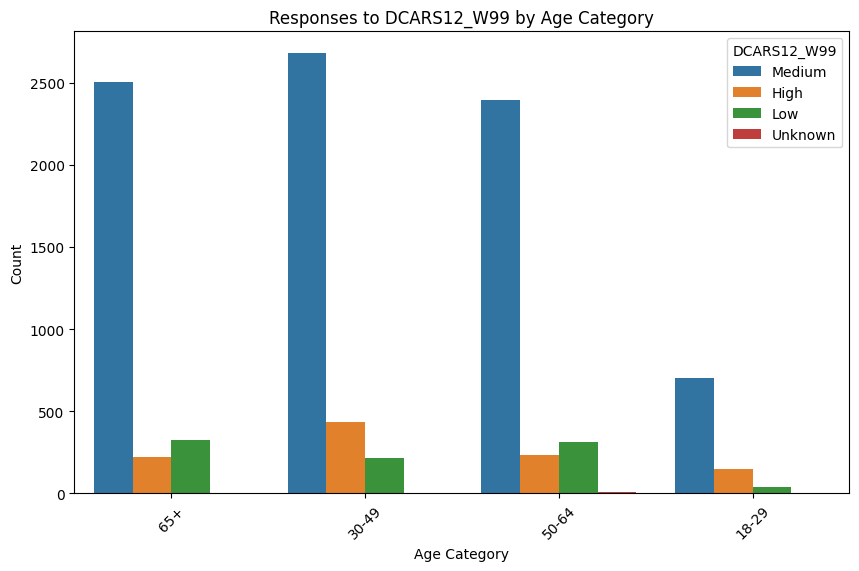

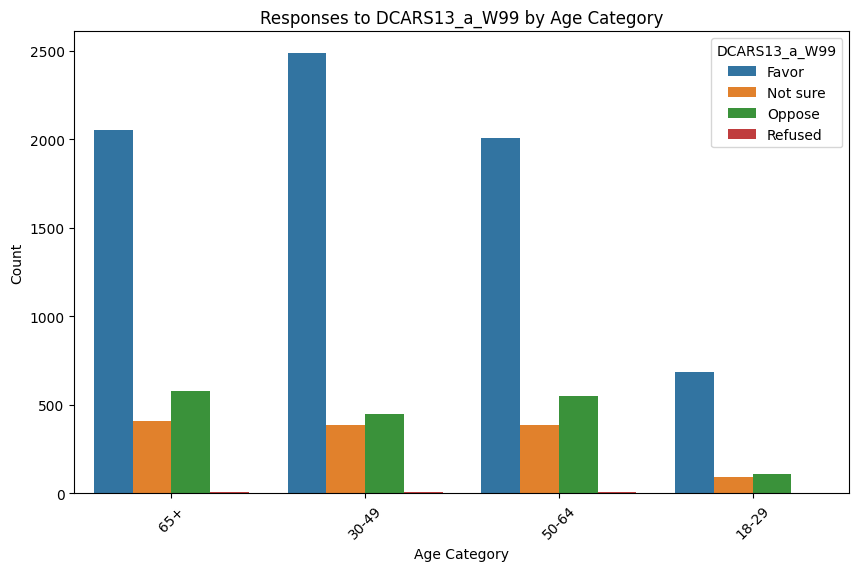

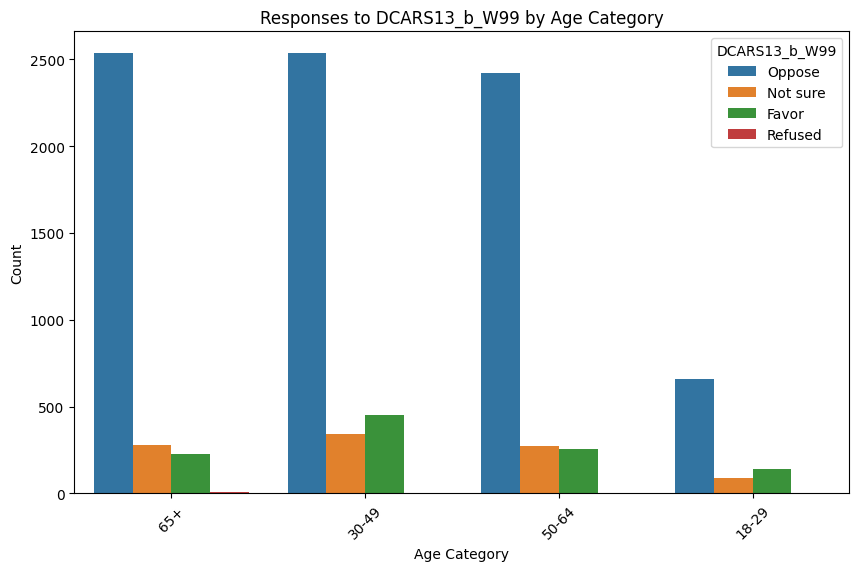

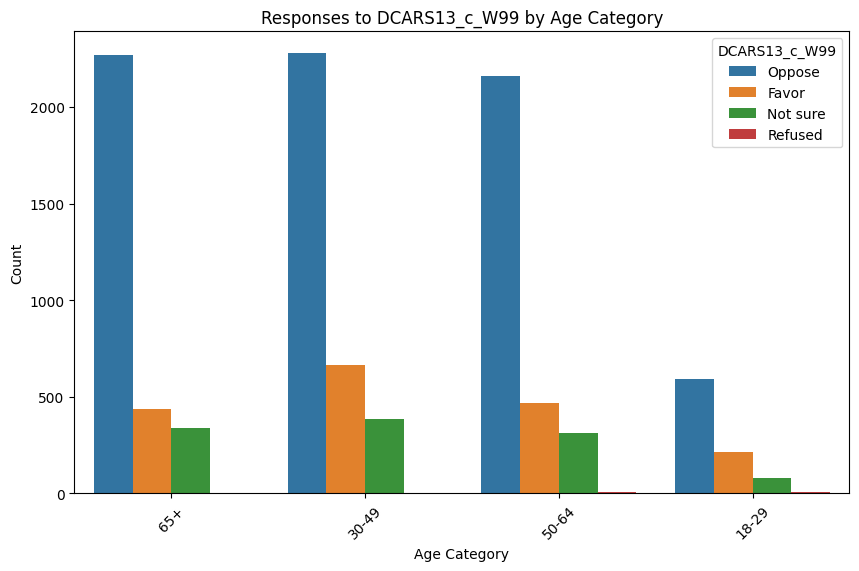

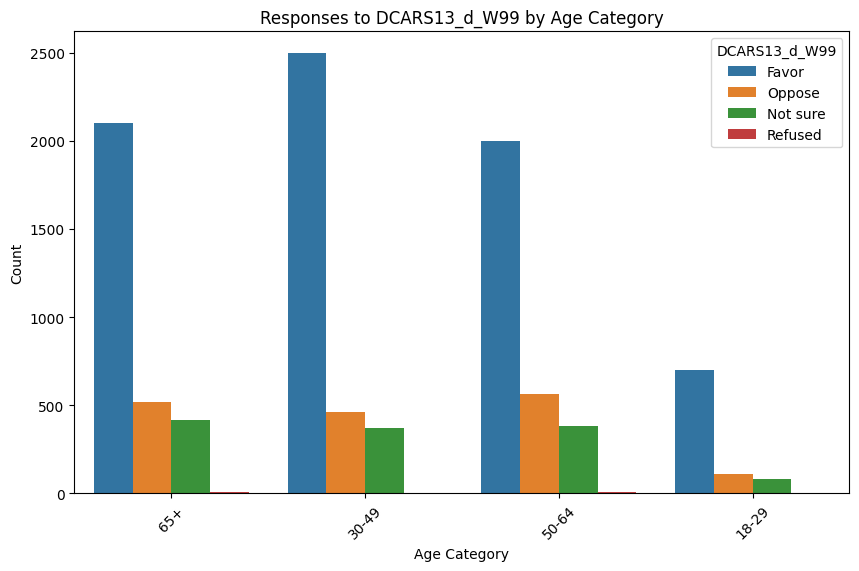

In [44]:
for col in dcars_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_filtered, x='F_AGECAT', hue=col)
    plt.title(f'Responses to {col} by Age Category')
    plt.xlabel('Age Category')
    plt.ylabel('Count')
    plt.legend(title=col)
    plt.xticks(rotation=45)
    plt.show()
#DCARS1 How much have you heard or read about driverless passenger vehicles?
#DCARS2 Do you think widespread use of driverless passenger vehicles would be a…
#DCARS3 Would you personally want to ride in a driverless passenger vehicle, if you had the opportunity?
#DCARS4 If the use of driverless passenger vehicles becomes widespread, do you think each of the following would happen? [RANDOMIZE ITEMS]
#   a. Older adults and people with disabilities will be able to live more independently
#   b. Many people who make their living by driving others or delivering things with passenger vehicles would lose their jobs
#   c. Getting from place to place would be less stressful
#   d. The computer systems in driverless
#DCARS5 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS6 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS7 In the case of an unavoidable accident, should the computer systems guiding driverless vehicles be designed to prioritize the safety of…
#DCARS8 How much of a role do you think each of the following groups should have in setting standards for how driverless passenger vehicles are used?
#   a. Federal government agencies
#   b The companies that develop driverless passenger vehicles
#   c. The people who use driverless passenger vehicles
#   d. The dealerships that sell driverless passenger vehicles
#DCARS9 If the use of driverless passenger vehicles becomes widespread, which is your greater concern?
#DCARS10 Which statement comes closer to your view when it comes to ensuring the safety and effectiveness of driverless passenger vehicles?
#DCARS11 Would the use of driverless passenger vehicles be more acceptable, less acceptable or would it make no difference in each of the following circumstances?
#DCARS12 If the use of driverless passenger vehicles became widespread, how comfortable would you feel sharing the road with them?
#DCARS13 The technology used to operate driverless passenger vehicles could be used for a number of purposes. Would you favor or oppose the use of this technology in each of the following purposes?
#   a. Taxis and ride-sharing vehicles
#   b. 18-wheeler trucks
#   c. Buses for public transportation
#   d. Delivery vehicles
